# <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style='background:#5ced73; border-radius: 10px; color:black; height: 48px'><center><h2>Sales Prediction Project</center>

## *Problem Description:*
    
#### *XYZ operates over 3,000 drug stores in 7 countries. XYZ store managers are currently tasked with predicting their daily sales up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school, and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.*

#### *You are provided with historical sales data for 1,115 XYZ stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.*

## Data Description

#### Salesdata.csv - Contains historical data including Sales
#### store.csv  - Contains information about the stores


### <u>Data fields:</u>

* **Id** - An Id that represents a (Store, Date) tuple within the set
*  **Store** - A unique Id for each store
*  **Sales** - The turnover for any given day (Dependent Variable)
* **Customers** - The number of customers on a given day
* **Open** - An indicator for whether the store was open: 0 = closed, 1 = open
* **StateHoliday** - Indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. All schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* **SchoolHoliday** - Indicates if the (Store, Date) was affected by the closure of public schools
* **StoreType** - Differentiates between 4 different store models: a, b, c, d
* **Assortment** - Describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.
* **CompetitionDistance** - Distance in meters to the nearest competitor store
* **CompetitionOpenSince [Month/Year]** - Gives the approximate year and month of the time the nearest competitor was opened
* **Promo** - Indicates whether a store is running a promo on that day
* **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* **Promo2Since [Year/Week]** - Describes the year and calendar week when the store started participating in Promo2
* **PromoInterval** - Describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## Business Problem

The interest in a product continues to change occasionally. No business can work on its monetary growth without assessing client interest and future demand of items precisely. 

Sales forecasting refers to the process of estimating demand for or sales of a particular product over a specific period of time. 

For a good sales forecast, it is also extremely important to get a good dataset. 

Forecasts heavily depend on the records, trends, and patterns observed for sales of a particular store. The variations could be due to several reasons.

Our goal here is to forecast the sales for six weeks for each store and find out the factors influencing it and recommend ways in order to improve the numbers.

## <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style='background:#5ced73;border-radius: 10px; color:black;height: 48px'><center><h2>Approach</center></h1>

### [**Data Collection and Preprocessing**](#title-one)

* Importing important libraries and modules
* Data Cleaning
* Missing Data Handling
* Merging the Datasets

### [**Exploratory Data Analysis**](#title-two)

* Hypotheses
* Categorical Features
* Continuous Features
* EDA Conclusion and Validating Hypotheses

### [**Feature Selection and Outlier Detection**](#title-three)

* Feature Engineering
* Outlier Detection and Treatment
    
### [**Modeling**](#title-four)

* Train Test Split
* Baseline Model - Decision Tree
* Random Forest Model
* Random Forest Hyperparameter Tuning
* Random Forest Feature Importance

### [**Model Performance and Evaluation**](#title-five)

* Visualizing Model Performances
* Random Forest vs Baseline Model
* Random Forest Tuned vs Baseline and Random Forest Models
    
### [**Store wise Sales Predictions**](#title-six)

### [**Conclusion**](#title-seven)

### [**Recommendations**](#title-eight)

</div>

### <a id='top'></a> <a id="title-one"></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style='background:#5ced73;border-radius: 10px; color:black;height: 48px'><center><h2>Data Collection and Preprocessing</center></h1>

### In this section, we will load the sales and store data, and perform initial exploration to understand the dataset structure and key statistics.


<a id="title-one"></a>

In [1]:
# Importing important libraries and modules

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime
import os
import warnings    
warnings.filterwarnings('ignore')

In [2]:
# Set the working directory
os.chdir('F:/Data_Science_LB/Project')

#### Load the dataset and perform initial exploration to understand the structure and key statistics.

In [4]:
# Load data
sales_df = pd.read_csv('Salesdata.csv')
stores_df = pd.read_csv('store.csv')

In [5]:
# Display the first few rows of sales data
print("Sales Data:")
sales_df.head()

Sales Data:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1


In [6]:
# Display the first few rows of store data
print("Store Data:")
stores_df.head()

Store Data:


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
# info about the sales dataset
print("Sales Data:")

sales_df.info()

Sales Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
# info about the store dataset
print("Store Data:")

stores_df.info()

Store Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
# Basic statistics
print("Sales Data:")

sales_df.describe()

Sales Data:


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [10]:
print("Store Data:")

stores_df.describe()

Store Data:


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [11]:
# null values in stores
print("Store Data:")

stores_df.isnull().sum()

Store Data:


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

#### Out of 1115 entries there are missing values for the columns:
* Competition Distance - distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly.

* Competition Open Since Month- gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month    
* Competition Open Since Year-  gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring month    
* Promo 2 Since Week, Promo 2 Since Year and Promo Interval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.      

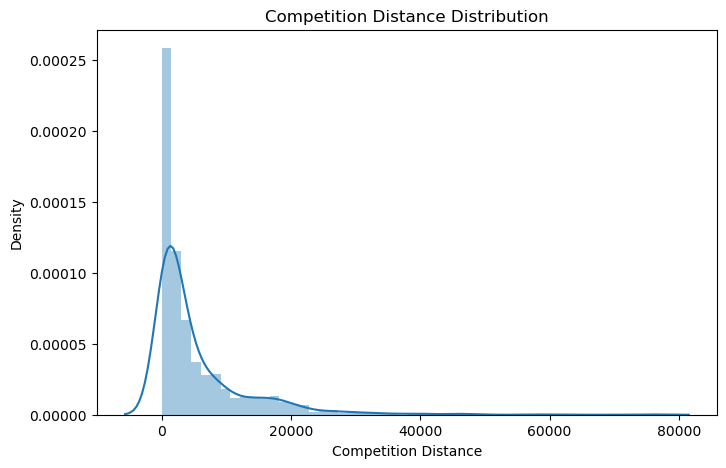

In [12]:
# Distribution plot of competition distance
sns.distplot(x=stores_df['CompetitionDistance'], hist = True)
plt.title('Competition Distance Distribution')
plt.xlabel('Competition Distance')
plt.ylabel('Density')
plt.show()

#### As most of the values of the Competition Distance are towards the left hand side, and the distribution is skewed on the right hand side. 
#### <u> Median is more robust to outlier effect.

In [13]:
# filling competition distance with the median value
stores_df['CompetitionDistance'].fillna(stores_df['CompetitionDistance'].median(), inplace = True)

In [14]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
stores_df['CompetitionOpenSinceMonth'].fillna(stores_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
stores_df['CompetitionOpenSinceYear'].fillna(stores_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [15]:
# imputing the nan values of promo2 related columns with 0
stores_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
stores_df['Promo2SinceYear'].fillna(value=0,inplace=True)
stores_df['PromoInterval'].fillna(value=0,inplace=True)

In [16]:
# check
stores_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

#### Merging the two Datasets

In [17]:
# merge the datasets on stores data

df = sales_df.merge(right=stores_df, on="Store", how="left")

In [18]:
# first five rows of the merged dataset

df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31-07-2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,31-07-2015,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,31-07-2015,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,31-07-2015,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,31-07-2015,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [19]:
# shape of the dataframe

df.shape

(1017209, 18)

#### Unique Values in Categorical Features

In [20]:
# datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [21]:
# creating a categorical column list 

categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [22]:
# checking the unique values involved and if all the values are in appropriate datatypes

for col in categorical_variables:
    print(f'Unique values for {col}: {df[col].unique()}')

Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Open: [1 0]
Unique values for Promo: [1 0]
Unique values for StateHoliday: ['0' 'a' 'b' 'c' 0]
Unique values for SchoolHoliday: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2: [0 1]
Unique values for Promo2SinceWeek: [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for Promo2SinceYear: [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for PromoInterval: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [23]:
# change into int type

df['StateHoliday'].replace({'0':0}, inplace=True)

#### Extracting from the Date

In [24]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

#creating features from the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.weekofyear
df['DayOfYear'] = df['Date'].dt.dayofyear

# Get unique years
years = df['Year'].unique()

### <a id='top'></a> <a id="title-two"></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style='background:#5ced73;border-radius: 10px; color:black;height: 48px'><center><h2>Exploratory Data Analysis</center></h1>

Exploratory data analysis is a crucial part of data analysis. It involves exploring and analyzing the dataset given to find patterns, trends and conclusions to make better decisions related to the data, often using statistical graphics and other data visualization tools to summarize the results. Python libraries like pandas are used to explore the data and matplotlib and seaborn to visualize it. It includes analyzing what our dataset consists of. Exploring continuous as well as categorical variables and their influence on our dependent variable-'Sales'.

**Hypotheses**

Just by observing the head of the dataset and understanding the features involved in it,  the following hypotheses could be framed:

* There's a feature called "DayOfWeek" with the values 1-7 denoting each day of the week. There would be a week off probably Sunday when the stores would be closed and we would get low overall sales.
* Customers would have a positive correlation with Sales.
* The Store type and Assortment strategy involved would be having a certain effect on sales as well. Some premium high quality products would fetch more revenue.
* Promotion should be having a positive correlation with Sales.
* Some stores were closed due to refurbishment, those would generate 0 revenue for that time period.
* Stores are influenced by seasonality, probably before holidays sales would be high.

Next step is to explore and see in a data driven way about the factors influencing XYZ stores sales and how.

### Categorical Features:

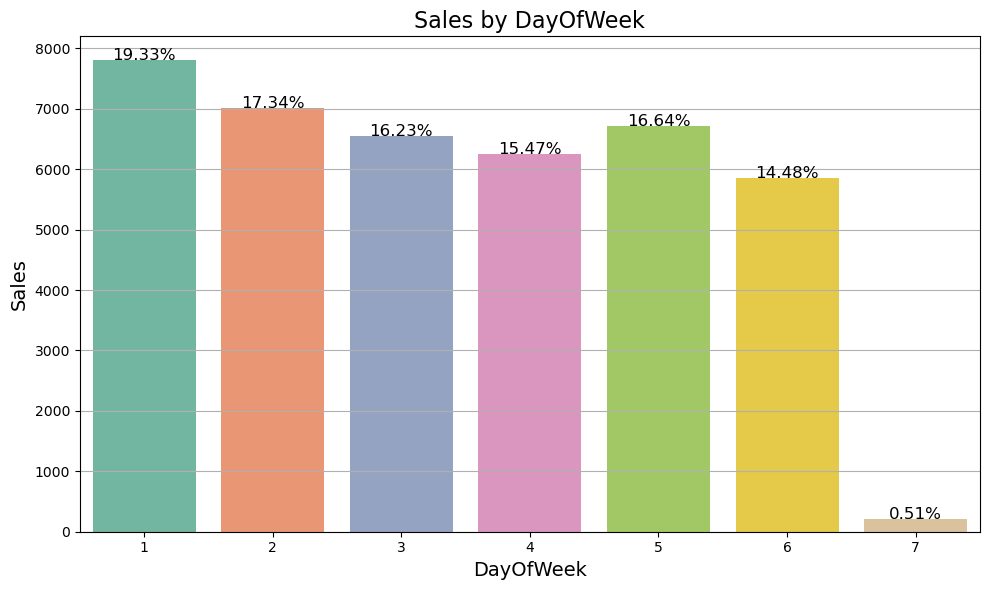

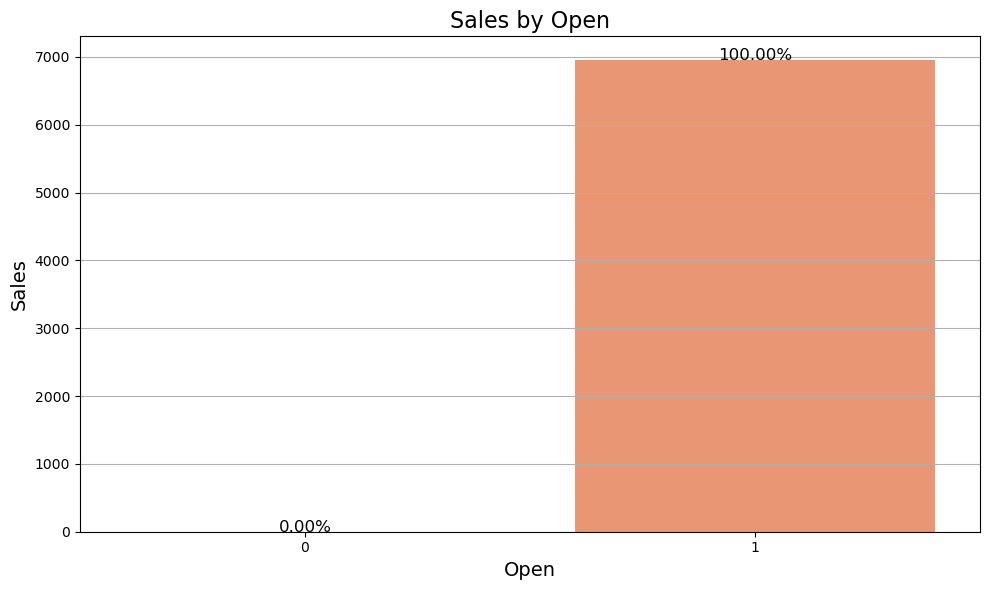

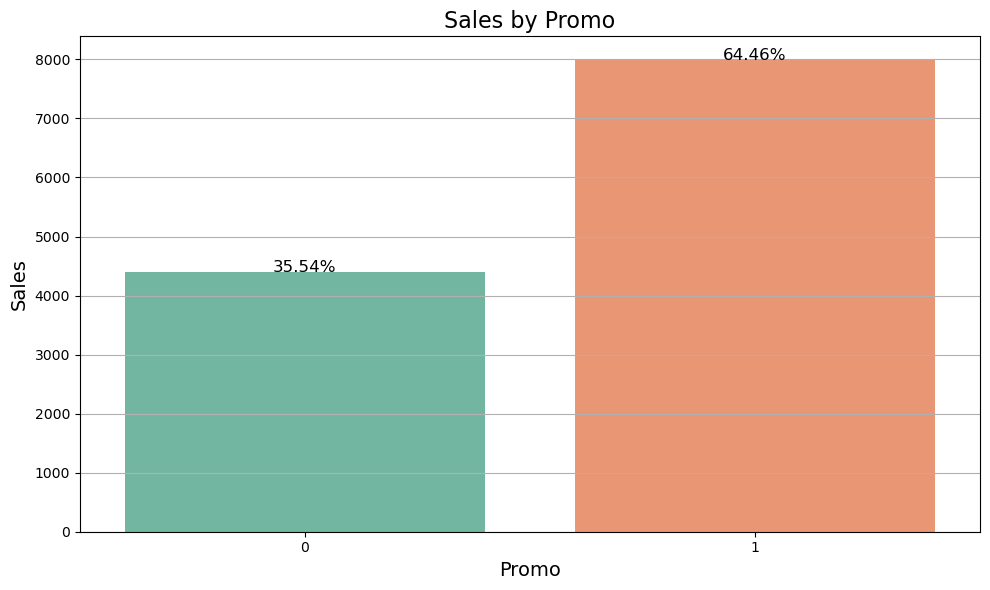

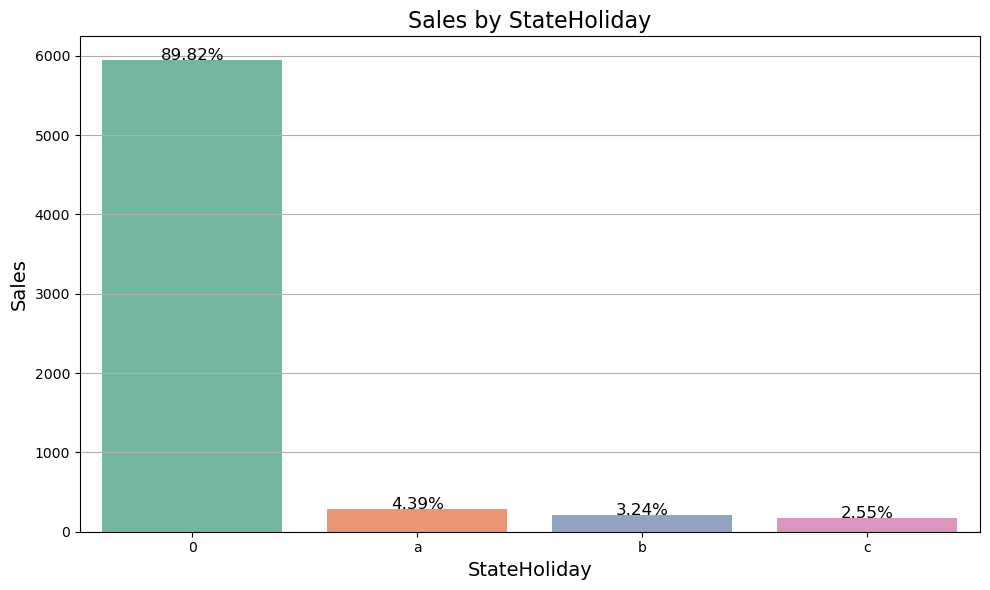

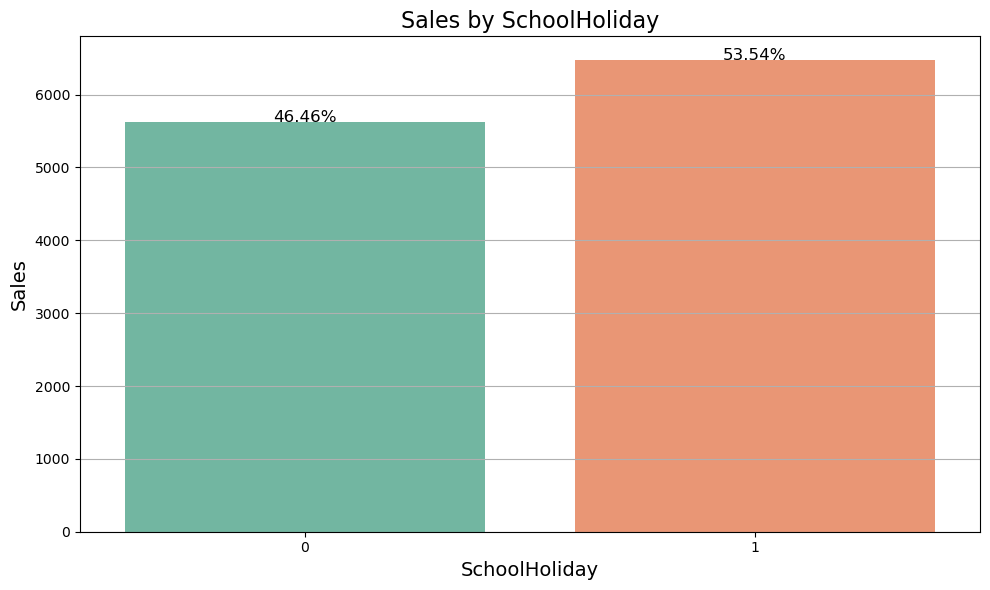

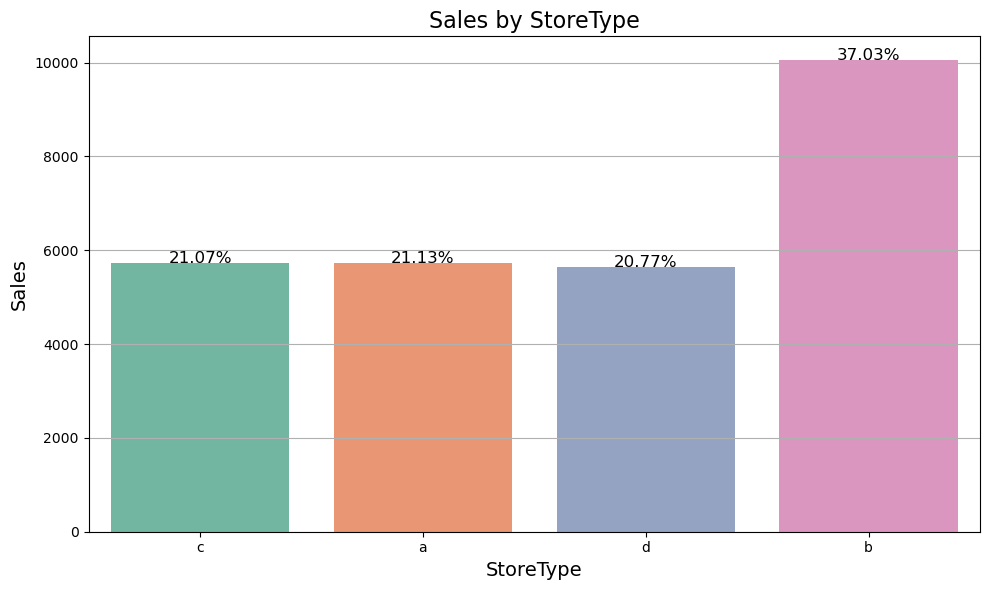

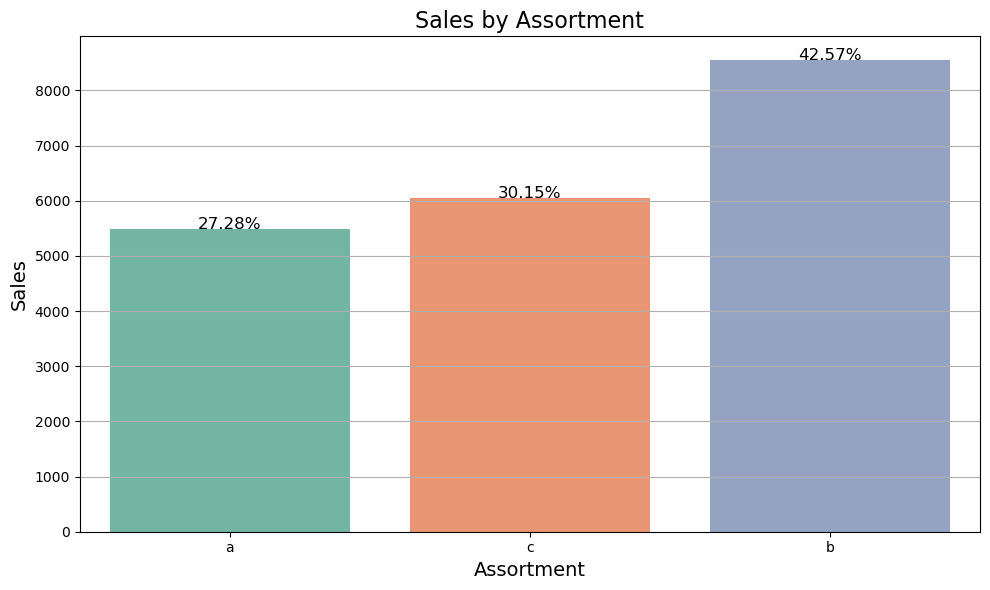

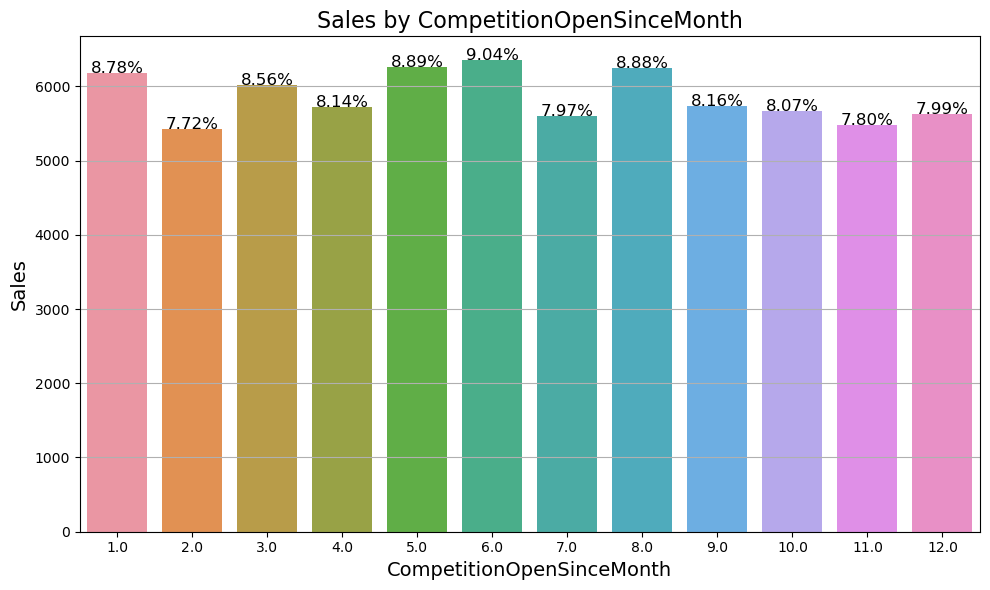

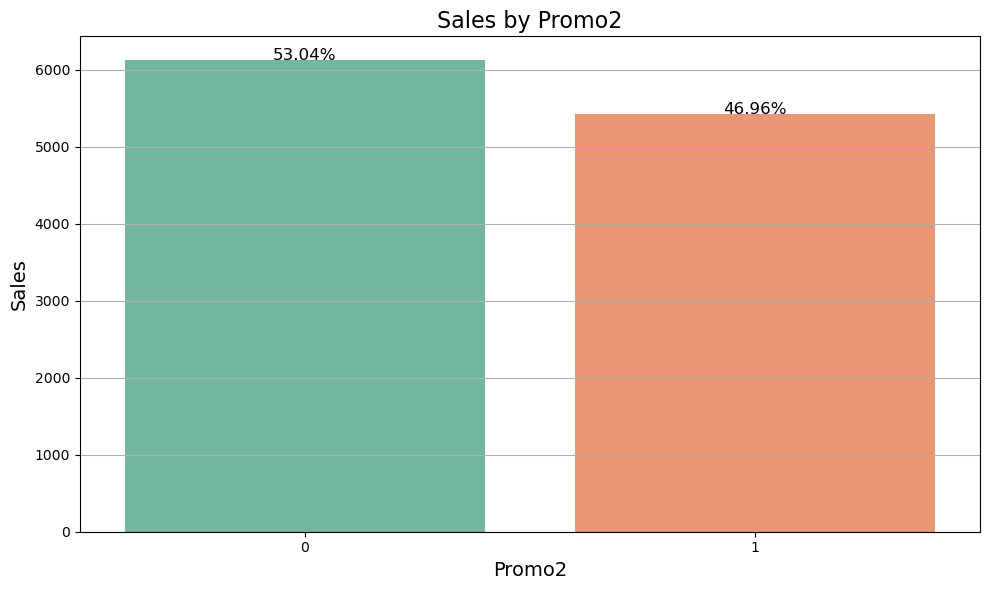

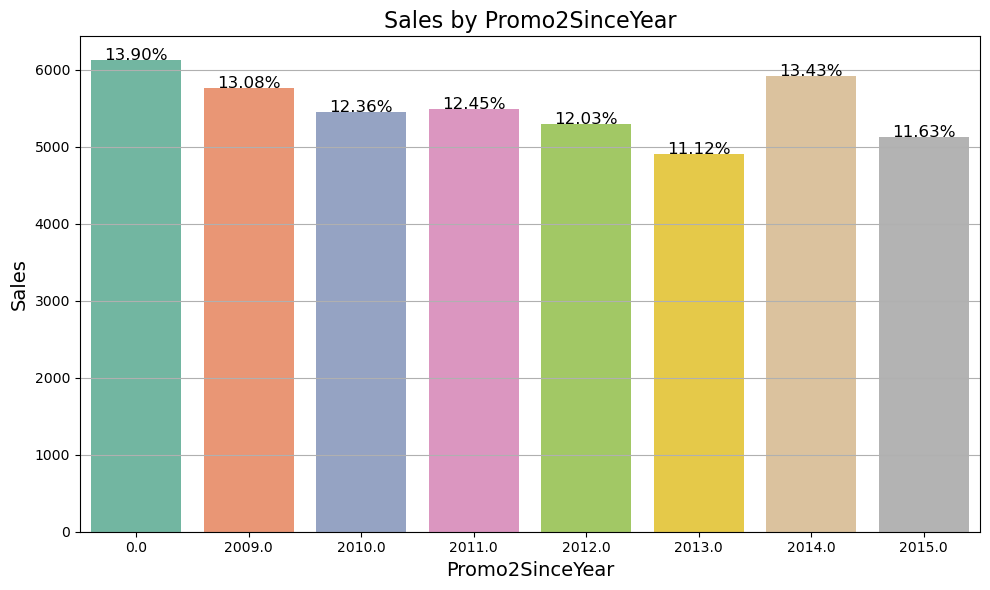

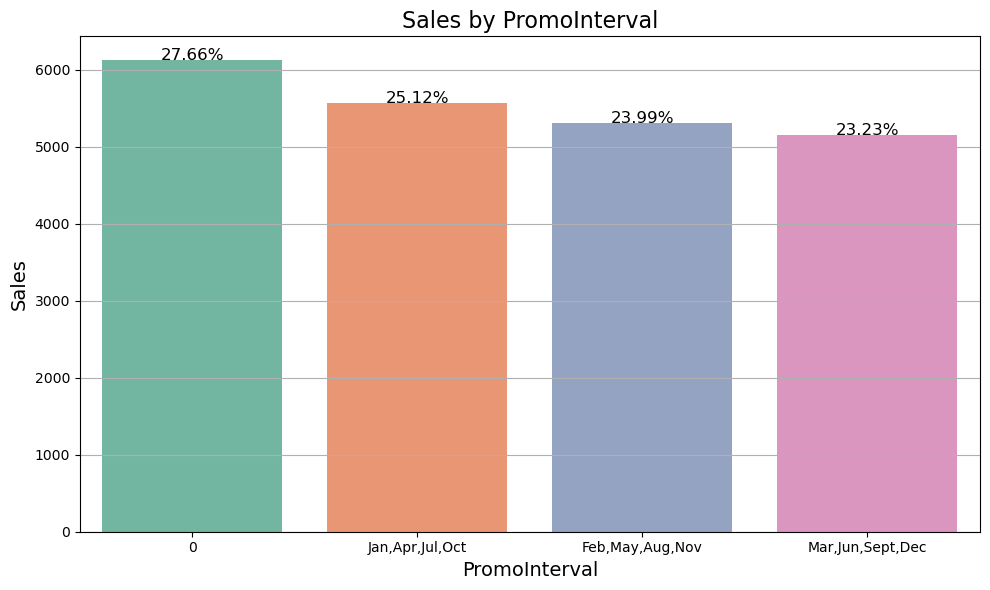

In [25]:
# code for barplots of the categorical variables against sales
# iterating over the categorical variables and plotting each of them
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']

sns.set_palette("Set2")

for value in categorical_variables:
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=df[value], y=df['Sales'], ci=None)  # ci=None removes error bars for cleaner look
    
    # Calculate the total height for each patch
    totals = [i.get_height() for i in ax.patches]
    total = sum(totals)

    # Annotate each bar with the percentage
    for i in ax.patches:
        height = i.get_height()
        percentage = (height / total) * 100
        ax.text(i.get_x() + i.get_width() / 2., height + 0.05, f'{percentage:.2f}%', ha='center', fontsize=12, color='black')
    
    # Adding title and labels
    ax.set_title(f'Sales by {value}', fontsize=16)
    ax.set_xlabel(value, fontsize=14)
    ax.set_ylabel('Sales', fontsize=14)
    
    # Adding grid for better readability
    ax.yaxis.grid(True)
    
    plt.tight_layout()
    plt.show()

#### Observation:
*  There were more sales on Monday, probably because shops generally remain closed on Sundays.
* It could be seen that the Promo leads to more sales.
* Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None. Lowest of Sales were seen on state holidays especially on Christmas.
* More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.
* On an average Store type B had the highest sales.
* Highest average sales were seen with Assortment levels-b which is 'extra'.
* With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.

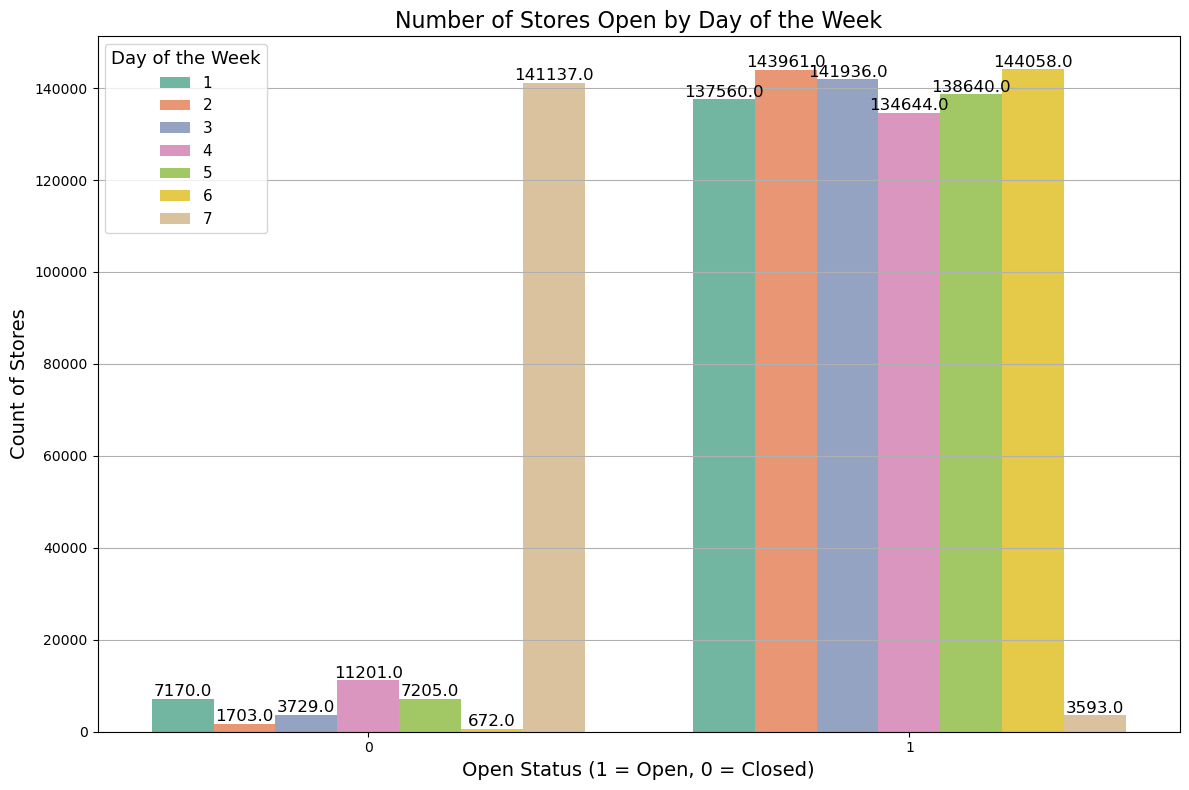

In [26]:
# Lets see how many shops are open on which days, and this gives a counts of stores closed for refurbishment 
# and suggests that most stores are closed on sunday.

# Set a color palette
sns.set_palette("Set2")

# Create the count plot
plt.figure(figsize=(12, 8))
ax = sns.countplot(x=df["Open"], hue=df["DayOfWeek"])

# Adding title and labels
ax.set_title('Number of Stores Open by Day of the Week', fontsize=16)
ax.set_xlabel('Open Status (1 = Open, 0 = Closed)', fontsize=14)
ax.set_ylabel('Count of Stores', fontsize=14)

# Adding grid for better readability
ax.yaxis.grid(True)

# Adjust the legend
plt.legend(title='Day of the Week', title_fontsize='13', fontsize='11', loc='upper left')

# Adding annotations
for p in ax.patches:
    count = p.get_height()
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., count), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12, color='black')

# Show the plot
plt.tight_layout()
plt.show()

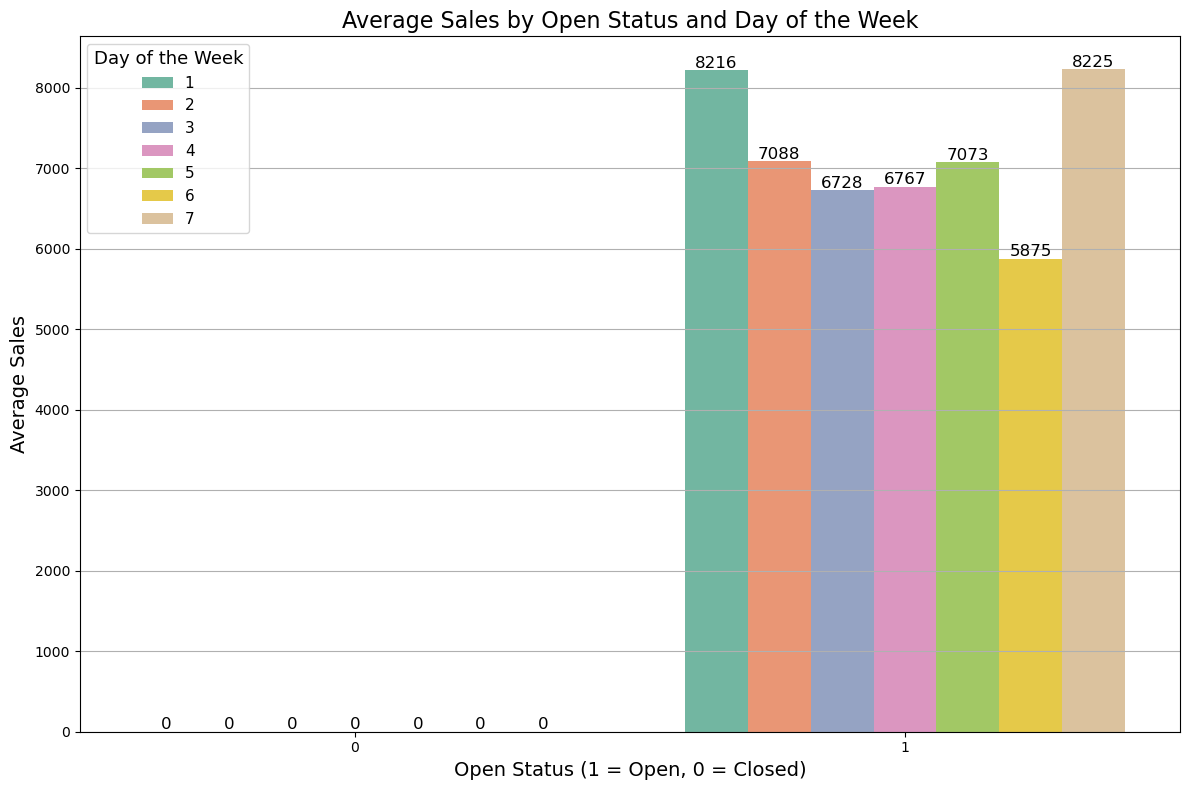

In [27]:
# open and close storetype relationship
# this indicates - Open suggests that whether the store was open or closed for refurbishment and weekends or holidays

# Set a color palette
sns.set_palette("Set2")

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=df["Open"], y=df['Sales'], hue=df["DayOfWeek"], ci=None)

# Adding title and labels
ax.set_title('Average Sales by Open Status and Day of the Week', fontsize=16)
ax.set_xlabel('Open Status (1 = Open, 0 = Closed)', fontsize=14)
ax.set_ylabel('Average Sales', fontsize=14)

# Adding grid for better readability
ax.yaxis.grid(True)

# Adding counts on the individual bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12, color='black')

# Adjust the legend
plt.legend(title='Day of the Week', title_fontsize='13', fontsize='11', loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

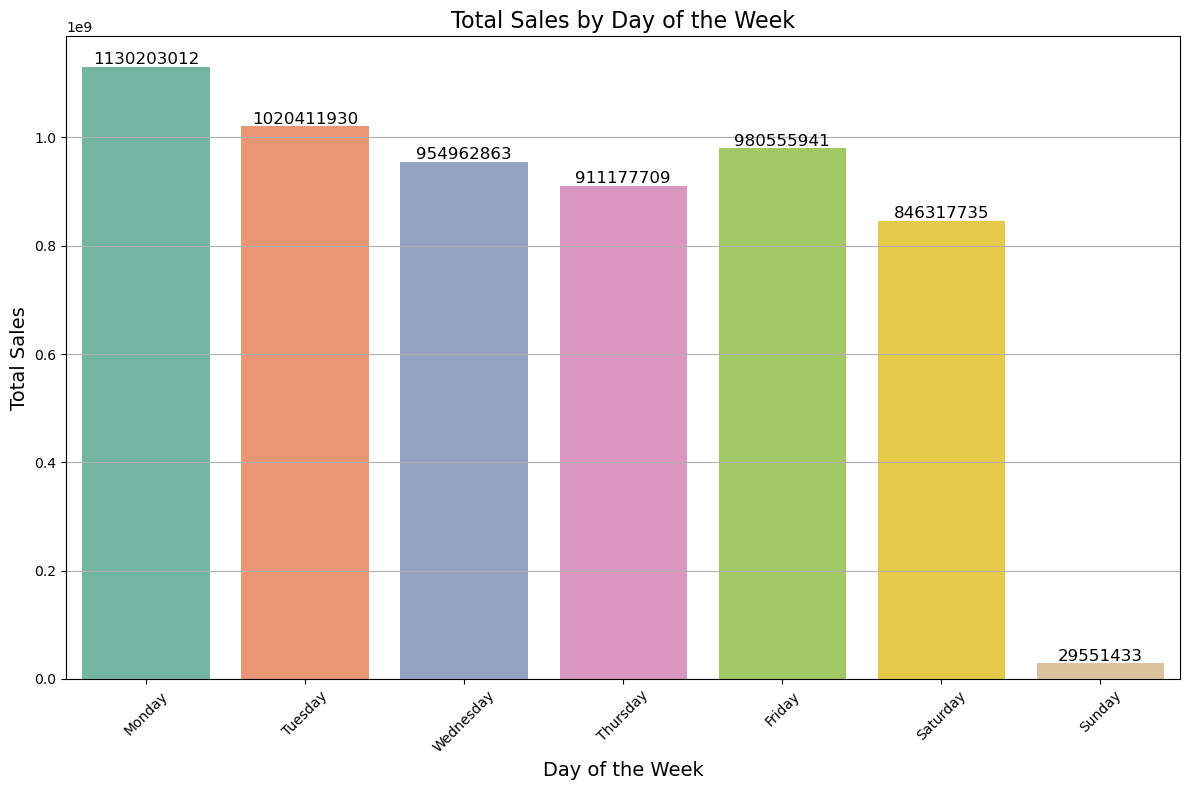

In [28]:
# Aggregate total sales by day of the week
total_sales_by_day = df.groupby('DayOfWeek')['Sales'].sum().reset_index()

# Mapping days of the week to their names
day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
total_sales_by_day['DayOfWeek'] = total_sales_by_day['DayOfWeek'].map(day_mapping)

# Set a color palette
sns.set_palette("Set2")

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=total_sales_by_day["DayOfWeek"], y=total_sales_by_day['Sales'], ci=None)

# Adding title and labels
ax.set_title('Total Sales by Day of the Week', fontsize=16)
ax.set_xlabel('Day of the Week', fontsize=14)
ax.set_ylabel('Total Sales', fontsize=14)

# Adding grid for better readability
ax.yaxis.grid(True)

# Adding counts on the individual bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12, color='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

#### Observation:
This is a count plot of open shops according to the day of the week. It's clear that the number of shops open on Sundays were very less and hence low sales. Some shops were closed on weekdays as well accounting to the stores closed due to refurbishment or holidays. 

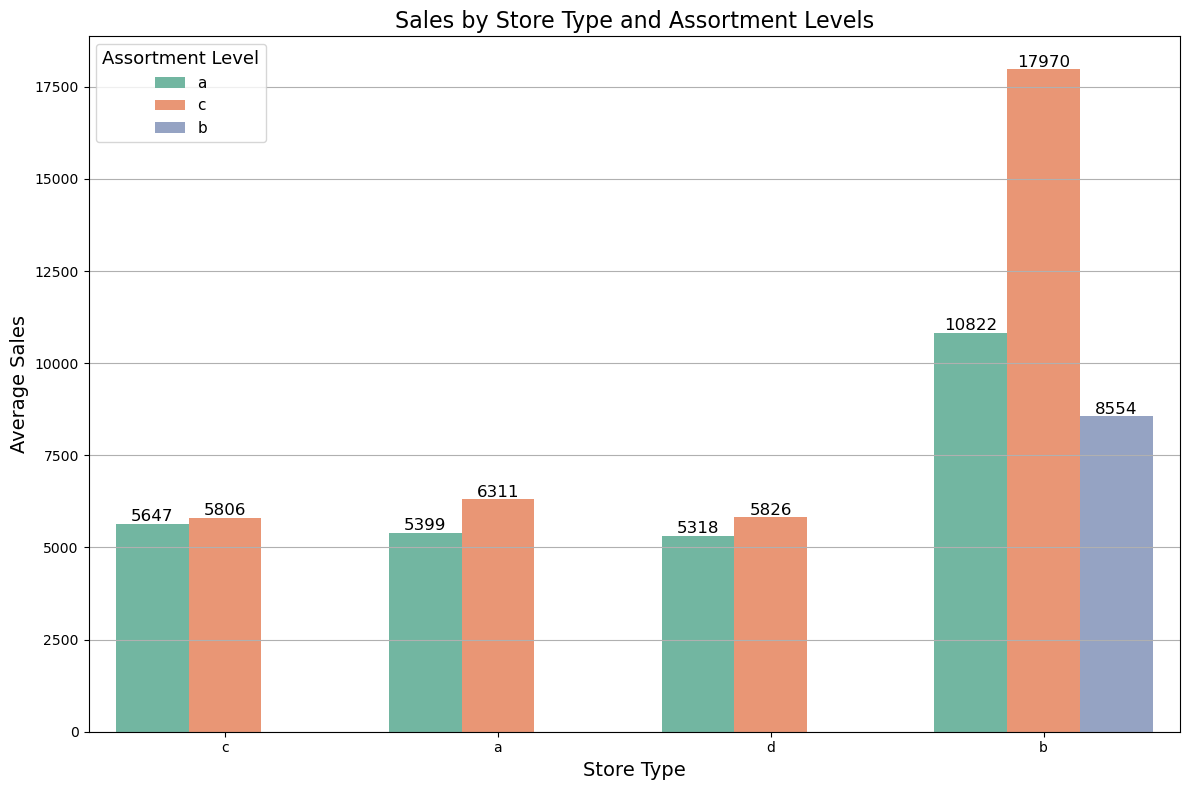

In [29]:
# Let's check the relationship between store type, assortment levels and sales

# Set a color palette
sns.set_palette("Set2")

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=df["StoreType"], y=df['Sales'], hue=df["Assortment"], ci=None)

# Adding title and labels
ax.set_title('Sales by Store Type and Assortment Levels', fontsize=16)
ax.set_xlabel('Store Type', fontsize=14)
ax.set_ylabel('Average Sales', fontsize=14)

# Adding grid for better readability
ax.yaxis.grid(True)

# Adding counts on the individual bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12, color='black')

# Adjust the legend
plt.legend(title='Assortment Level', title_fontsize='13', fontsize='11', loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

#### Observation:
The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores.

In [30]:
# Store Type and Sales Exploration
store_type = df.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True) # sorting into descending order to get higher values
store_type

,StoreType,Sales,Customers
0,a,3165334859,363541434
3,d,1765392943,156904995
2,c,783221426,92129705
1,b,159231395,31465621


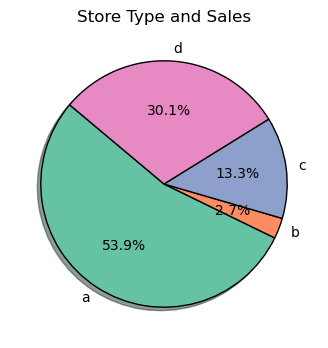

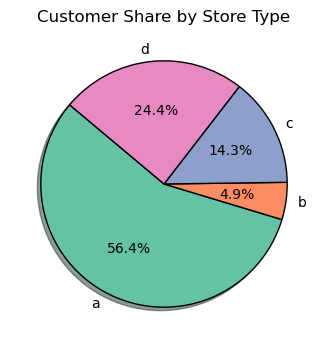

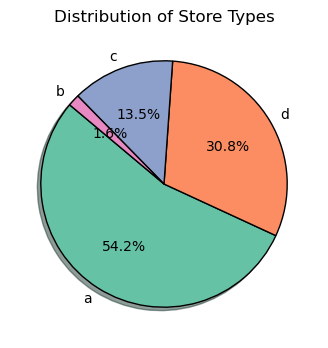

In [31]:
# let's explore store type a bit and it's influence on sales

# Set the figure size and color palette
plt.figure(figsize=(4, 4))
colors = sns.color_palette("Set2")

# Total sales by store type
df.groupby("StoreType")["Sales"].sum().plot.pie(
    title='Store Type and Sales',
    autopct='%1.1f%%',
    shadow=True,
    colors=colors,
    startangle=140,
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'}
)
plt.ylabel('')  # Hide the y-label
plt.show()

# Total customers by store type
plt.figure(figsize=(4, 4))
df.groupby("StoreType")["Customers"].sum().plot.pie(
    title='Customer Share by Store Type',
    autopct='%1.1f%%',
    shadow=True,
    colors=colors,
    startangle=140,
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'}
)
plt.ylabel('')  # Hide the y-label
plt.show()

# Store type distribution in the dataset
plt.figure(figsize=(4, 4))
df["StoreType"].value_counts().plot.pie(
    title='Distribution of Store Types',
    autopct='%1.1f%%',
    shadow=True,
    colors=colors,
    startangle=140,
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'}
)
plt.ylabel('')  # Hide the y-label
plt.show()

#### Observation:
* A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle. Earlier it was seen that the store type b had the highest sales on an average because the default estimation function to the barplot is mean. 
* But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.
* Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.

### Continuous Features:

#### Sales with Time

In [32]:
years

array([2015, 2014, 2013], dtype=int64)

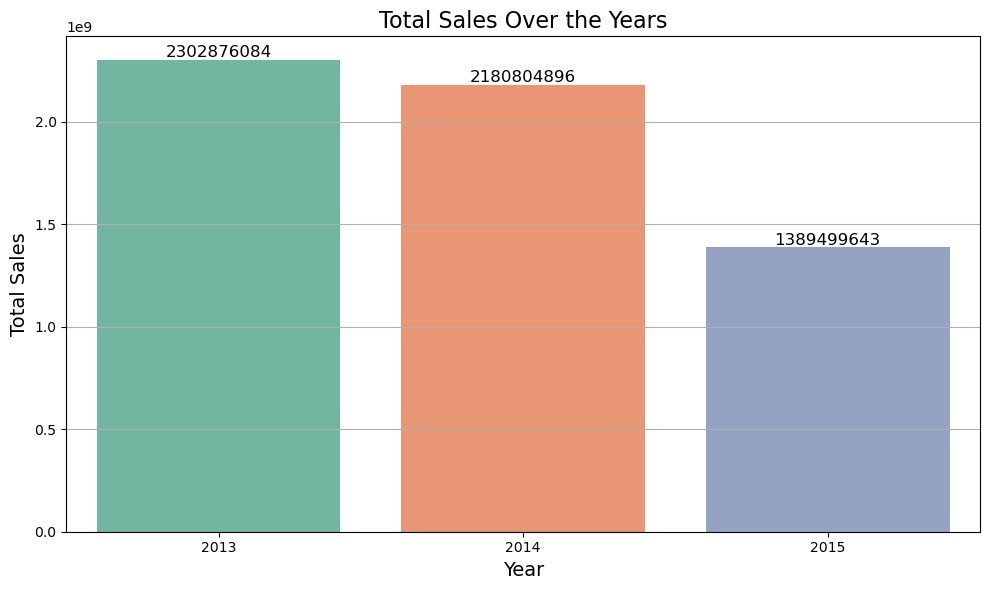

In [33]:
# Aggregate sales by year
sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()

# Set a color palette
sns.set_palette("Set2")

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sales_by_year["Year"], y=sales_by_year['Sales'], ci=None)

# Adding title and labels
ax.set_title('Total Sales Over the Years', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Total Sales', fontsize=14)

# Adding grid for better readability
ax.yaxis.grid(True)

# Adding counts on the individual bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12, color='black')

# Show the plot
plt.tight_layout()
plt.show()

In [34]:
# Filter data for each year
sales_2013 = df[df['Year'] == 2013]
sales_2014 = df[df['Year'] == 2014]
sales_2015 = df[df['Year'] == 2015]

In [35]:
# Aggregate sales by month for each year
sales_2013 = sales_2013.groupby('Month')['Sales'].sum()
sales_2014 = sales_2014.groupby('Month')['Sales'].sum()
sales_2015 = sales_2015.groupby('Month')['Sales'].sum()

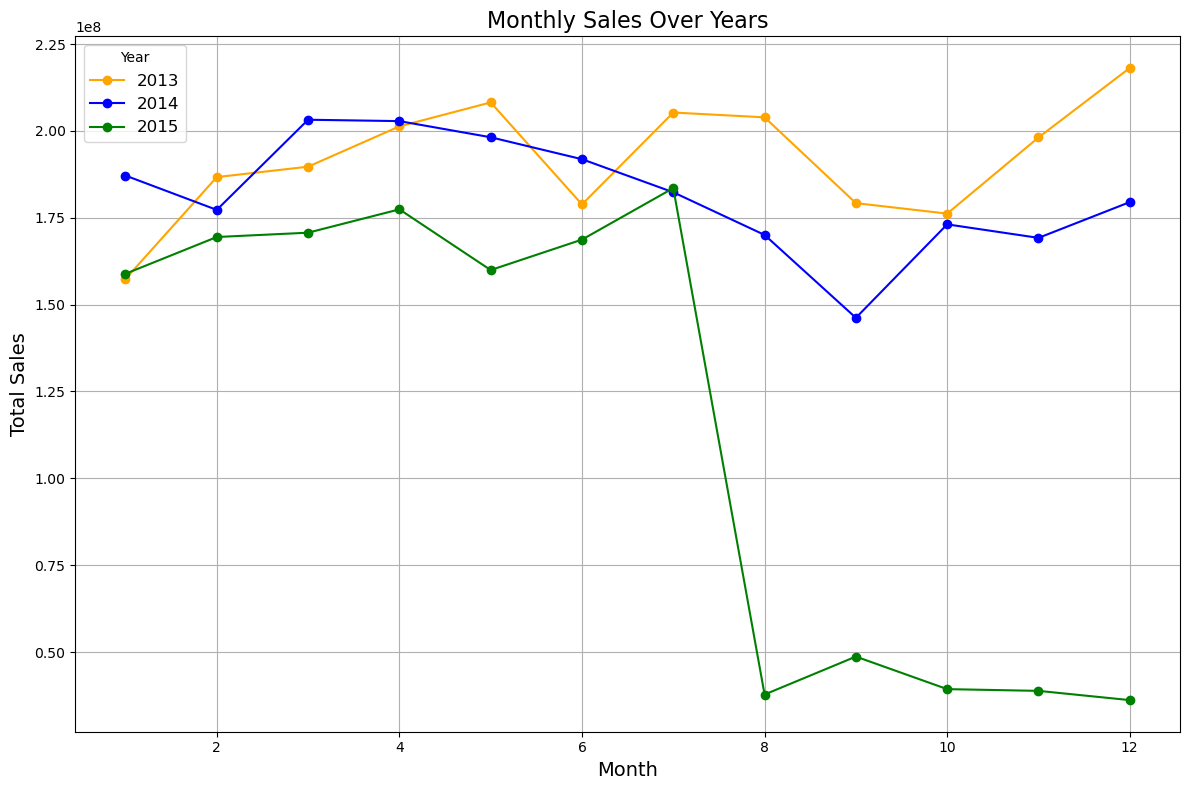

In [36]:
# Plotting
plt.figure(figsize=(12, 8))
plt.plot(sales_2013.index, sales_2013.values, label='2013', color='orange', marker='o')
plt.plot(sales_2014.index, sales_2014.values, label='2014', color='blue', marker='o')
plt.plot(sales_2015.index, sales_2015.values, label='2015', color='green', marker='o')


# Adding title and labels
plt.title('Monthly Sales Over Years', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Adding grid for better readability
plt.grid(True)

# Adding legend
plt.legend(title='Year', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

#### Observation:
Sales rise up by the end of the year before the holidays. Sales for 2015 went down there for a couple months - August to December, indicating stores closed due to refurbishment.

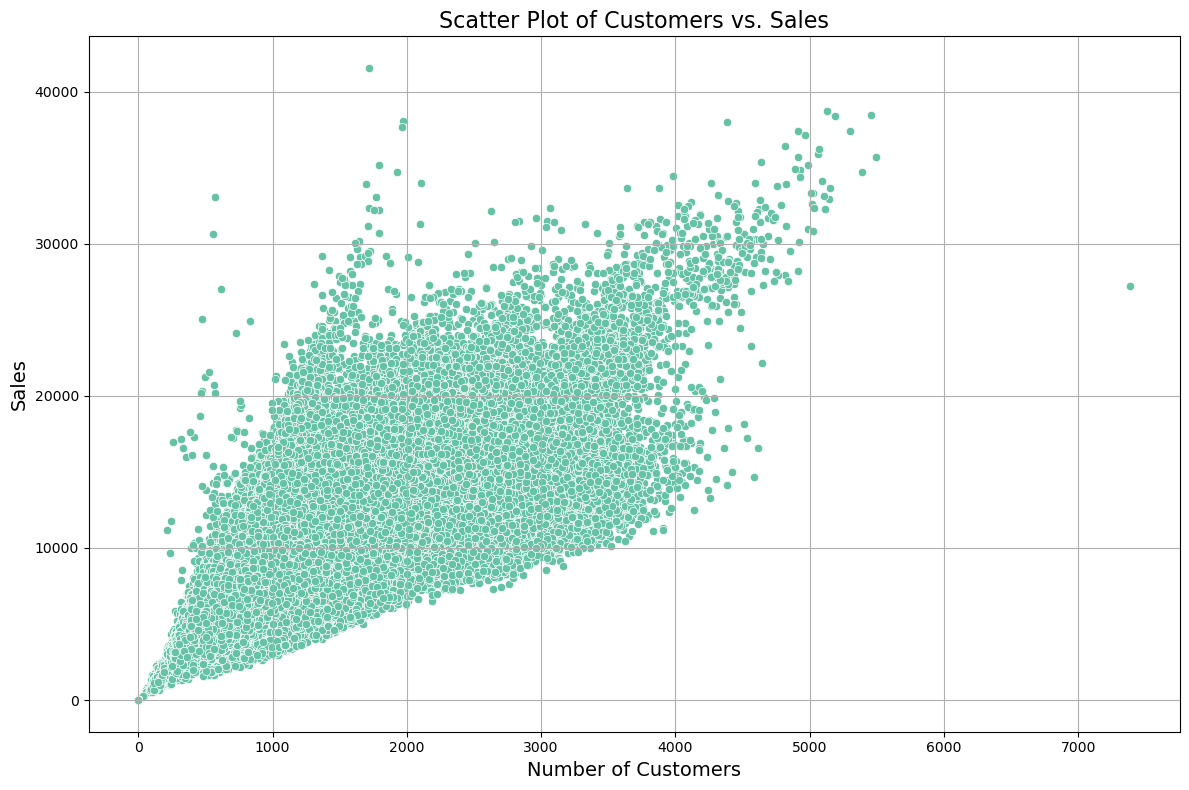

In [37]:
# scatterplot of Customers and Sales

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the scatter plot
sns.scatterplot(x=df['Customers'], y=df['Sales'])

# Adding title and labels
plt.title('Scatter Plot of Customers vs. Sales', fontsize=16)
plt.xlabel('Number of Customers', fontsize=14)
plt.ylabel('Sales', fontsize=14)

# Adding grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

#### Observation:
Sales and Customer scatter plot shows a direct positive relation between them with a few outliers.

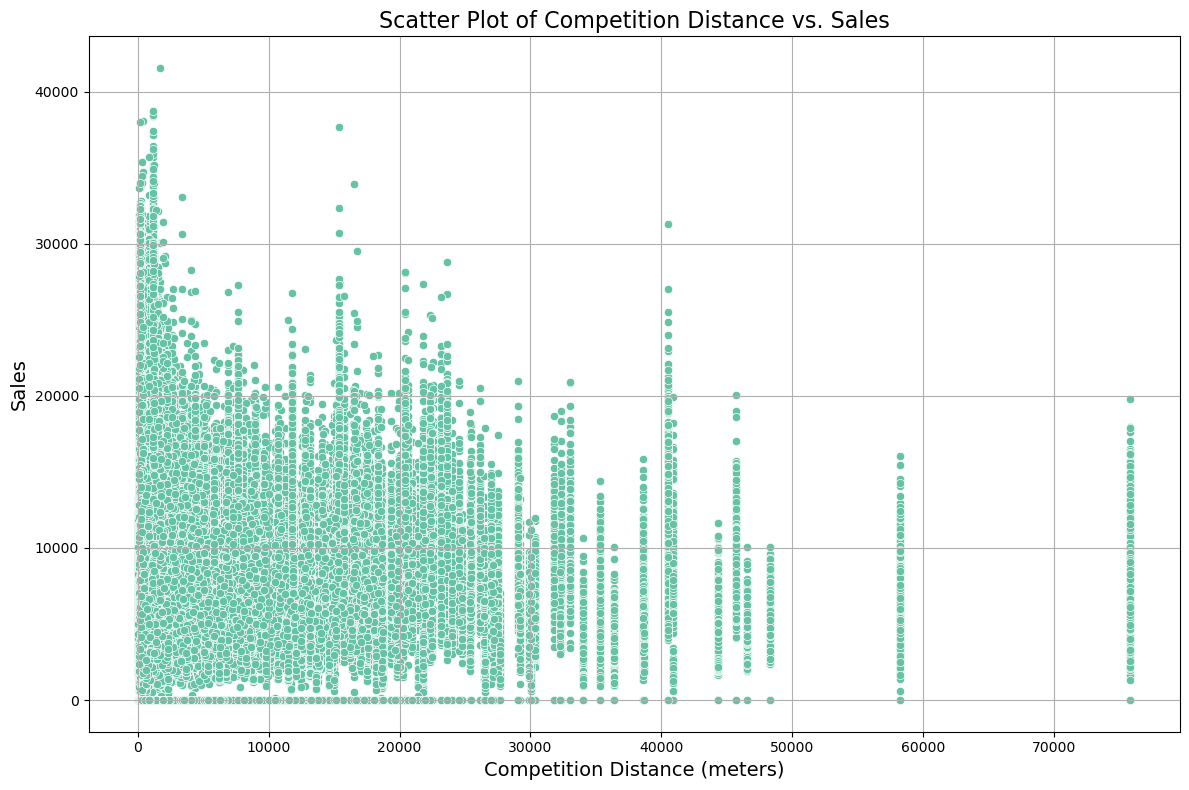

In [38]:
# scatterplot of Competition Distance and Sales

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the scatter plot
sns.scatterplot(x=df['CompetitionDistance'], y=df['Sales'])

# Adding title and labels
plt.title('Scatter Plot of Competition Distance vs. Sales', fontsize=16)
plt.xlabel('Competition Distance (meters)', fontsize=14)
plt.ylabel('Sales', fontsize=14)

# Adding grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

#### Observation:
From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

<Axes: ylabel='Density'>

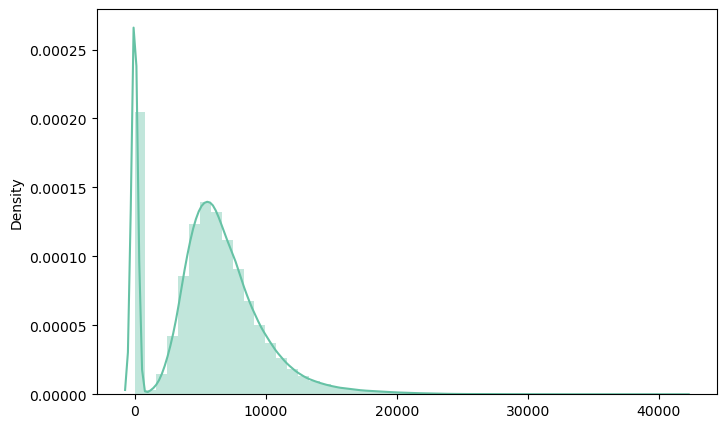

In [39]:
# distribution plot of Sales, as expected positively skewed
sns.distplot(x=df['Sales'])

#### Observation:
The drop in sales indicates the 0 sales accounting to the stores temporarily closed due to refurbishment. This drop was also seen in the Sales over the years plot earlier.

### Correlation Matrix
Correlation is a statistical term used to measure the degree in which two variables move in relation to each other. A perfect positive correlation means that the correlation coefficient is exactly 1. This implies that as one variable moves, either up or down, the other moves in the same direction. A perfect negative correlation means that two variables move in opposite directions, while a zero correlation implies no linear relationship at all.

By checking the correlation the factors affecting sales can be figured out.

In [40]:
# we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop = ['Store', 'Year', 'WeekOfYear', 'DayOfYear']
corr_df = df.drop(columns = columns_to_drop, axis =1)
corr_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

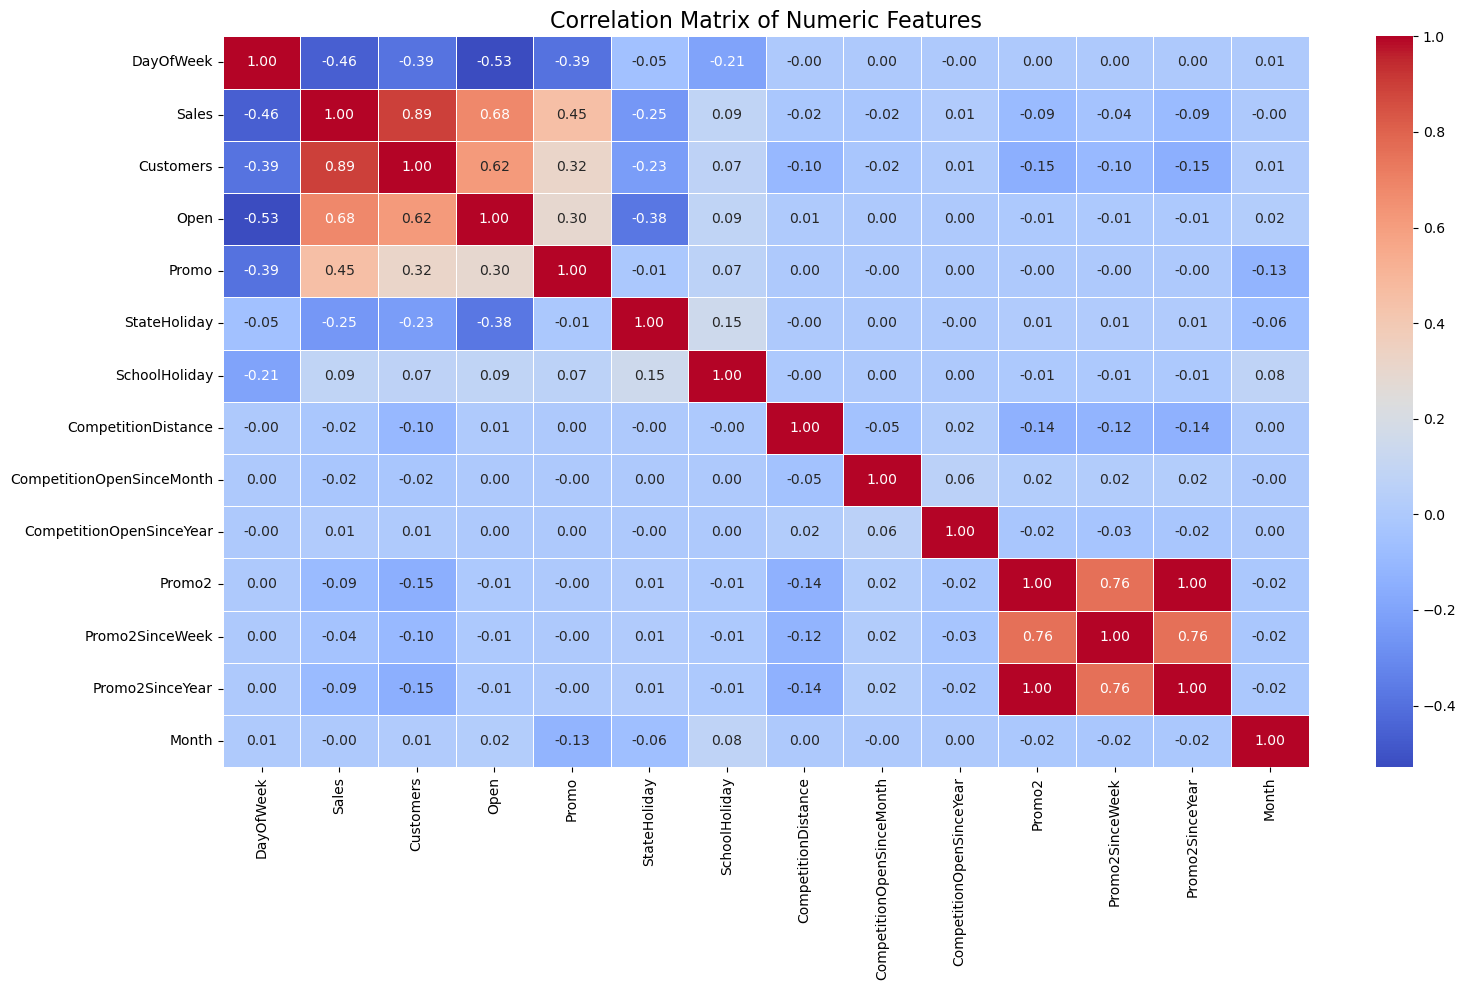

In [41]:
# correlation heatmap

# Set the figure size
plt.figure(figsize=(16, 10))

# Create the heatmap for the correlation matrix
sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=True, fmt='.2f', linewidths=0.5)

# Adding title
plt.title('Correlation Matrix of Numeric Features', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

### <a id='top'></a> <a id="title-three"></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style='background:#5ced73;border-radius: 10px; color:black;height: 48px'><center><h2>Data Manipulation and Feature Selection</center></h1>
    
#### Data manipulation involves manipulating and changing our dataset before feeding it to various machine learning models. This involves keeping important features, outlier treatment, feature scaling and creating dummy variables if necessary.

### Feature Engineering

In [42]:
# since the stores closed had 0 sale value; removing the irrelevant part
df1 = df[df.Open != 0]
df1.drop('Open', axis=1, inplace=True)

In [43]:
# check
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
0,1,5,2015-07-31,5263,555,1,0,1,c,a,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,212
1,2,5,2015-07-31,6064,625,1,0,1,a,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,212
2,3,5,2015-07-31,8314,821,1,0,1,a,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,212
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,...,9.0,2009.0,0,0.0,0.0,0,2015,7,31,212
4,5,5,2015-07-31,4822,559,1,0,1,a,a,...,4.0,2015.0,0,0.0,0.0,0,2015,7,31,212


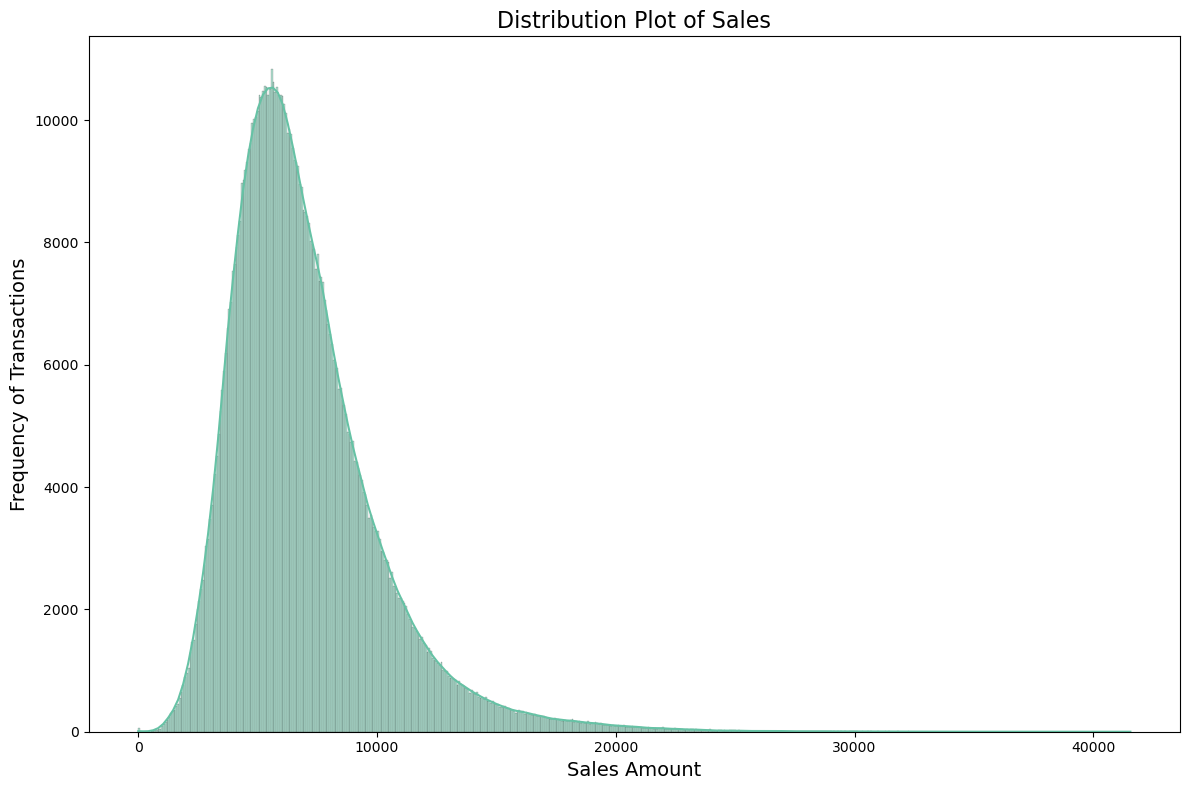

In [44]:
# distribution plot of Sales, as expected positively skewed

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the distribution plot using histplot
sns.histplot(df1['Sales'], kde=True)

# Adding title and labels
plt.title('Distribution Plot of Sales', fontsize=16)
plt.xlabel('Sales Amount', fontsize=14)
plt.ylabel('Frequency of Transactions', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [45]:
# transformation
df1['Sales'] = np.log(df1['Sales'])

In [46]:
df1.dropna(inplace=True)

In [47]:
df1.drop(df1[df1['Sales'] == float("-inf")].index,inplace=True)

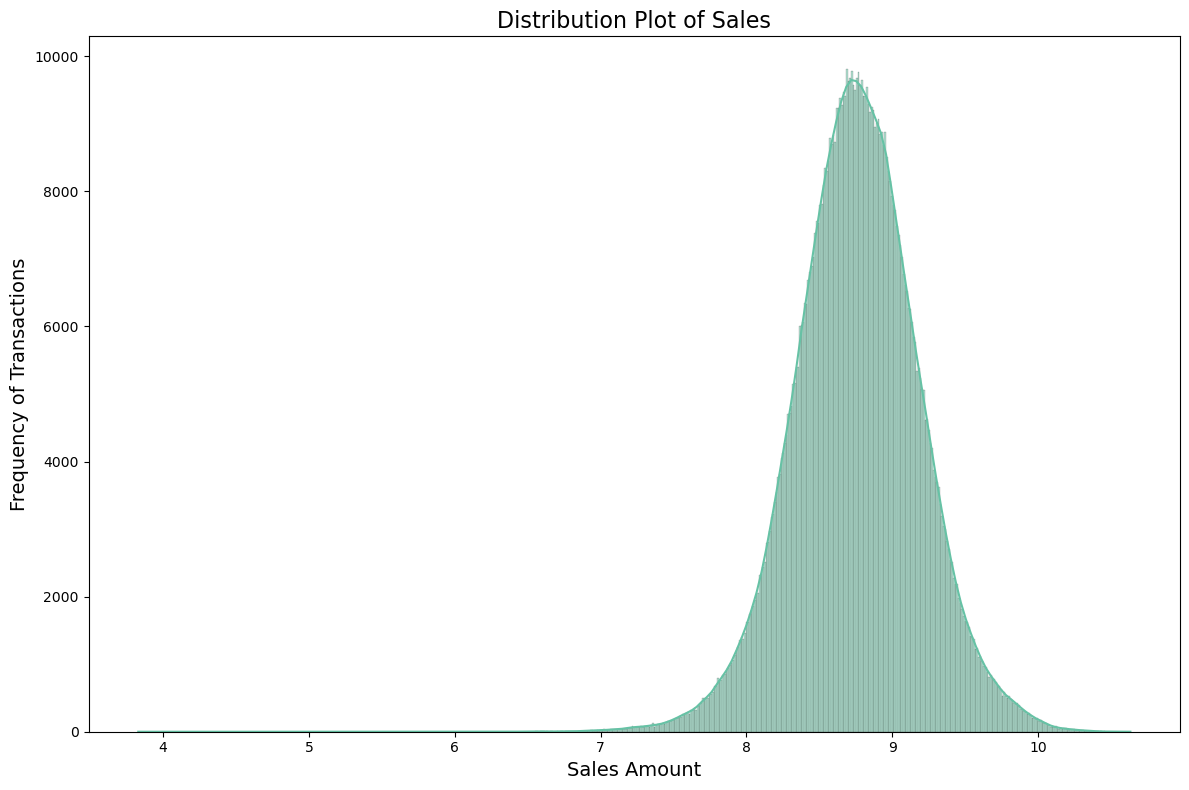

In [48]:
# distribution plot of Sales

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the distribution plot using histplot
sns.histplot(df1['Sales'], kde=True)

# Adding title and labels
plt.title('Distribution Plot of Sales', fontsize=16)
plt.xlabel('Sales Amount', fontsize=14)
plt.ylabel('Frequency of Transactions', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [49]:
#  changing into boolean 
df1['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

In [50]:
# combining competition open since month and year into total months
df1['CompetitionOpen'] = (df1['Year'] - df1['CompetitionOpenSinceYear'])*12 + (df1['Month'] - df1['CompetitionOpenSinceMonth'])
# correcting the neg values
df1['CompetitionOpen'] = df1['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
# dropping both the columns
df1.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

In [51]:
# changing promo2 features into meaningful inputs
# combining promo2 to total months
df1['Promo2Open'] = (df1['Year'] - df1['Promo2SinceYear'])*12 + (df1['WeekOfYear'] - df1['Promo2SinceWeek'])*0.230137

# correcting the neg values
df1['Promo2Open'] = df1['Promo2Open'].apply(lambda x:0 if x < 0 else x)*df1['Promo2']

# creating a feature for promo interval and checking if promo2 was running in the sale month
def promo2running(df):
    month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = df['PromoInterval'].split(',')
        if df['Month'] and month_dict[df['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

# Applying 
df1['Promo2running'] = df1.apply(promo2running,axis=1)*df1['Promo2']

# Dropping unecessary columns
df1.drop(['Promo2SinceYear','Promo2SinceWeek','PromoInterval'],axis=1,inplace=True)

In [52]:
# setting date and store as index
df1.set_index(['Date','Store'],inplace=True)
# sorting index following the time series
df1.sort_index(inplace=True)

In [53]:
df1.head(1)

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-01-01,85,2,8.34759,619,0,1,1,b,a,1870.0,0,2013,1,1,1,15.0,0.0,0


### Outlier Detection

#### Outliers and Z score:
In statistics, an outlier is a data point that differs significantly from other observations. Outliers can occur by chance in any distribution, but they often indicate either measurement error or that the population has a heavy-tailed distribution.

Z-score is a statistical measure that tells you how far is a data point from the rest of the dataset. In a more technical term, Z-score tells how many standard deviations away a given observation is from the mean.

z = (x-mean)/standard deviation

Total number of Outliers present in the Sales column are 1559.


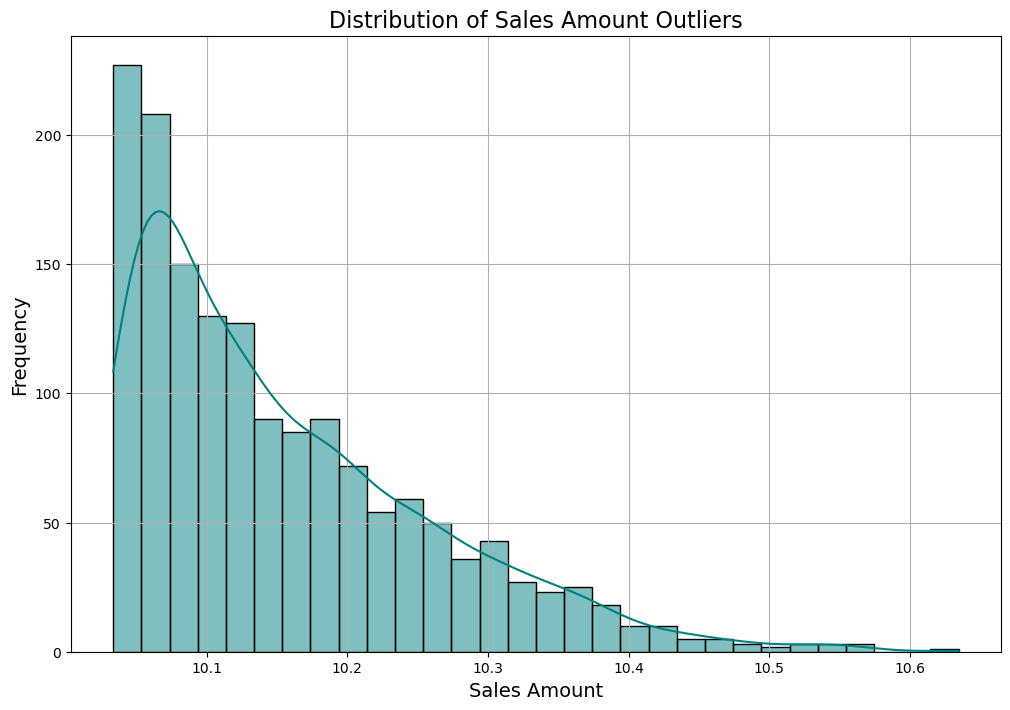

In [54]:
# code to seperate outliers
mean_sales = np.mean(df1['Sales']) #mean
sd_sales = np.std(df1['Sales'])   #standard deviation

# More than 3 standard deviation is an outlier
threshold = 3

# code to identify them
outliers = []
for value in df1['Sales']:
    z_score = (value-mean_sales)/sd_sales
    if z_score > threshold:
        outliers.append(value)
        
# total no of outliers        
print(f'Total number of Outliers present in the Sales column are {len(outliers)}.')

# Plotting the outlier distribution
plt.figure(figsize=(12, 8))
sns.histplot(outliers, kde=True, color='teal', bins=30, edgecolor='black').set(title='Outliers Distribution')
plt.xlabel('Sales Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Sales Amount Outliers', fontsize=16)
plt.grid(True)
plt.show()

#### The data points with sales value higher than 10.2 are very low and hence they an be considered as outliers. The percentage of outliers in our dataset:

In [55]:
# percentage of sales greater than 10.2
sales_outliers = df1.loc[df1['Sales']> 10.2]
percentage_of_outliers = (len(sales_outliers)/len(df1))*100
# print
print(f'The percentage of observations of sales greater than 28000 are {percentage_of_outliers}')

The percentage of observations of sales greater than 28000 are 0.050809036191667316


In [56]:
# exploring the reasons behind this behaviour
sales_outliers.head()

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-01-04,262,1,10.414093,5013,0,1,0,b,a,1180.0,0,2013,1,1,4,0.0,0.0,0
2013-01-05,262,3,10.408828,5106,1,1,0,b,a,1180.0,0,2013,1,1,5,0.0,0.0,0
2013-01-07,817,1,10.394243,4448,1,0,1,a,a,140.0,0,2013,1,2,7,82.0,0.0,0
2013-01-09,262,7,10.402018,5145,0,0,0,b,a,1180.0,0,2013,1,2,9,0.0,0.0,0
2013-01-12,262,7,10.460357,4894,0,0,0,b,a,1180.0,0,2013,1,2,12,0.0,0.0,0


The data points with sales value higher than 10.2 are very low and hence they an be considered as outliers. The percentage of outliers in our dataset:

In [57]:
# percentage of sales greater than 10.2
sales_outliers = df1.loc[df1['Sales']> 10.2]
percentage_of_outliers = (len(sales_outliers)/len(df1))*100
# print
print(f'The percentage of observations of sales greater than 28000 are {percentage_of_outliers}')

The percentage of observations of sales greater than 28000 are 0.050809036191667316


In [58]:
# exploring the reasons behind this behaviour
sales_outliers

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-01-04,262,1,10.414093,5013,0,1,0,b,a,1180.0,0,2013,1,1,4,0.0,0.000000,0
2013-01-05,262,3,10.408828,5106,1,1,0,b,a,1180.0,0,2013,1,1,5,0.0,0.000000,0
2013-01-07,817,1,10.394243,4448,1,0,1,a,a,140.0,0,2013,1,2,7,82.0,0.000000,0
2013-01-09,262,7,10.402018,5145,0,0,0,b,a,1180.0,0,2013,1,2,9,0.0,0.000000,0
2013-01-12,262,7,10.460357,4894,0,0,0,b,a,1180.0,0,2013,1,2,12,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-03,262,7,10.248141,4668,0,0,0,b,a,1180.0,0,2015,8,32,215,27.0,0.000000,0
2015-10-02,644,2,10.248566,1418,0,0,0,c,a,4030.0,1,2015,10,40,275,130.0,53.983562,1
2015-10-05,262,7,10.358600,4729,0,0,0,b,a,1180.0,0,2015,10,41,278,29.0,0.000000,0


In [59]:
# lets see which stores were open on Sunday in the outliers dataframe
# store 262
sales_outliers.loc[sales_outliers['DayOfWeek']==7]

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-01-09,262,7,10.402018,5145,0,0,0,b,a,1180.0,0,2013,1,2,9,0.0,0.0,0
2013-01-12,262,7,10.460357,4894,0,0,0,b,a,1180.0,0,2013,1,2,12,0.0,0.0,0
2013-02-06,262,7,10.311084,4533,0,0,0,b,a,1180.0,0,2013,2,6,37,0.0,0.0,0
2013-03-02,262,7,10.272323,4144,0,0,0,b,a,1180.0,0,2013,3,9,61,0.0,0.0,0
2013-03-03,262,7,10.280210,4314,0,0,0,b,a,1180.0,0,2013,3,9,62,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-02,262,7,10.304811,4228,0,0,0,b,a,1180.0,0,2015,8,31,214,27.0,0.0,0
2015-08-03,262,7,10.248141,4668,0,0,0,b,a,1180.0,0,2015,8,32,215,27.0,0.0,0
2015-10-05,262,7,10.358600,4729,0,0,0,b,a,1180.0,0,2015,10,41,278,29.0,0.0,0


#### Observation:
Some interesting insights can be drawn from these outliers dataframe:
* First thing that comes to notice is the DayOfWeek for Store 262. It's sunday and it has high sales and it's of the store type B. 
* All other data points had promotion going on and they had a high number of Customers as well indicating no absurd behavior.
* It can be well established that the outliers are showing this behavior for the stores with promotion = 1 and store type B. It would not be wise to treat them because the reasons behind this behavior seems fair.


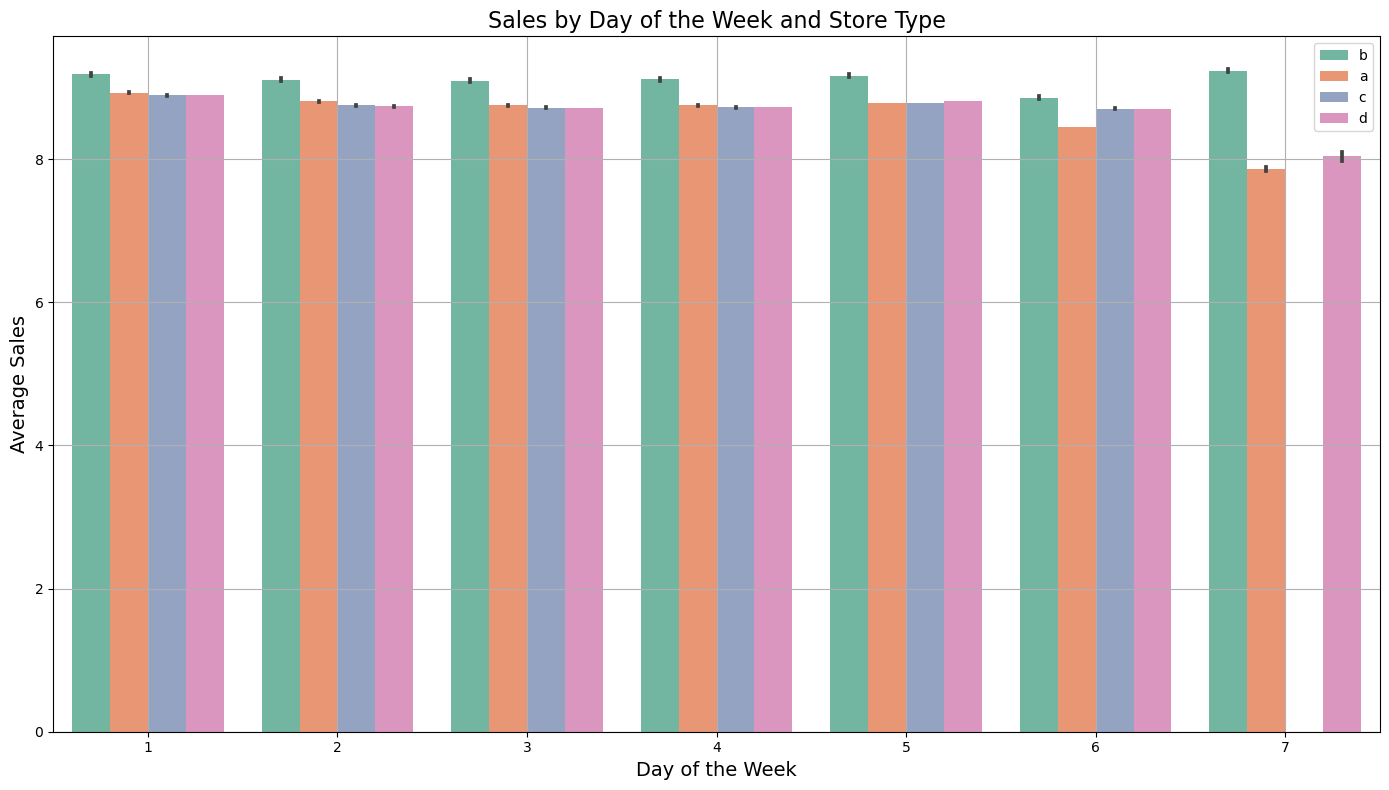

In [60]:
# let's explore store type and Day Of week

# Set the figure size
plt.figure(figsize=(14, 8))

# Create the bar plot
sns.barplot(x=df1['DayOfWeek'], y=df1['Sales'], hue=df1['StoreType'])

# Adding title and labels
plt.title('Sales by Day of the Week and Store Type', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average Sales', fontsize=14)

# Adding grid for better readability
plt.grid(True)
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

In [61]:
# let's verify in the full dataset
df1.loc[(df1['DayOfWeek']==7) & (df1['StoreType']=='b')]

DayOfWeek      Sales  Customers  Promo  StateHoliday  \
Date       Store                                                         
2013-01-09 85             7   9.525589       1858      0             0   
           259            7   9.556975       2848      0             0   
           262            7  10.402018       5145      0             0   
           274            7   8.691651       1331      0             0   
           335            7   8.996280       1581      0             0   
...                     ...        ...        ...    ...           ...   
2015-12-07 733            7   9.675583       3282      0             0   
           769            7   9.392995       2635      0             0   
           948            7   9.377125       2336      0             0   
           1081           7   8.668540        858      0             0   
           1097           7   9.490167       2686      0             0   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-09 85                 0         b          a               1870.0   
           259                0         b          b                210.0   
           262                0         b          a               1180.0   
           274                0         b          b               3640.0   
           335                0         b          a                 90.0   
...                         ...       ...        ...                  ...   
2015-12-07 733                0         b          b                860.0   
           769                0         b          b                840.0   
           948                0         b          b               1430.0   
           1081               0         b          a                400.0   
           1097               0         b          b                720.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date       Store                                                                
2013-01-09 85          0  2013      1           2          9             15.0   
           259         0  2013      1           2          9              0.0   
           262         0  2013      1           2          9              0.0   
           274         1  2013      1           2          9              0.0   
           335         1  2013      1           2          9              0.0   
...                  ...   ...    ...         ...        ...              ...   
2015-12-07 733         0  2015     12          50        341            194.0   
           769         1  2015     12          50        341             27.0   
           948         0  2015     12          50        341             27.0   
           1081        0  2015     12          50        341            117.0   
           1097        0  2015     12          50        341            165.0   

                  Promo2Open  Promo2running  
Date       Store                             
2013-01-09 85       0.000000              0  
           259      0.000000              0  
           262      0.000000              0  
           274      0.000000              1  
           335      0.000000              1  
...                      ...            ...  
2015-12-07 733      0.000000              0  
           769     36.460274              0  
           948      0.000000              0  
           1081     0.000000              0  
           1097     0.000000              0  

[2216 rows x 17 columns]

#### Observation:
* This suggests that store type b had high sales almost all week. No store of type C was open on Sunday.
* Being open 24*7 along with all kinds of assortments available is probably the reason why it had higher average sales than any other store type.

In [62]:
# shape
df1.shape

(844338, 17)

**Outlier Treatment**

- It can be well established that the outliers are showing this behaviour for the stores with promotion = 1 and store type B. It would not be wise to treat them because the reasons behind this behaviour seems fair and important from the business point of view.
- The primary reasons for the behaviour are promotion and store type B.
- If the outliers are a valid occurrence it would be wise not to treat them by deleting or manipulating them especially when we have established the ups and downs of the target variable in relation to the other features. It is well established that there is seasonality involved and no linear relationship is possible to fit. For these kinds of datasets tree based machine learning algorithms are used which are robust to outlier effect.

In [63]:
# just in case something messes up
df2 = df1.copy()

In [64]:
df2.head()

DayOfWeek     Sales  Customers  Promo  StateHoliday  \
Date       Store                                                        
2013-01-01 85             2  8.347590        619      0             1   
           259            2  8.832150       1444      0             1   
           262            2  9.756552       2875      0             1   
           274            2  8.039802        729      0             1   
           335            2  7.783641        482      0             1   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-01 85                 1         b          a               1870.0   
           259                1         b          b                210.0   
           262                1         b          a               1180.0   
           274                1         b          b               3640.0   
           335                1         b          a                 90.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date       Store                                                                
2013-01-01 85          0  2013      1           1          1             15.0   
           259         0  2013      1           1          1              0.0   
           262         0  2013      1           1          1              0.0   
           274         1  2013      1           1          1              0.0   
           335         1  2013      1           1          1              0.0   

                  Promo2Open  Promo2running  
Date       Store                             
2013-01-01 85            0.0              0  
           259           0.0              0  
           262           0.0              0  
           274           0.0              1  
           335           0.0              1

In [65]:
# Sales should be the last col
columns=list(df2.columns)
columns.remove('Sales')
columns.append('Sales')
df2=df2[columns]

In [66]:
# check
df2.head()

DayOfWeek  Customers  Promo  StateHoliday  SchoolHoliday  \
Date       Store                                                             
2013-01-01 85             2        619      0             1              1   
           259            2       1444      0             1              1   
           262            2       2875      0             1              1   
           274            2        729      0             1              1   
           335            2        482      0             1              1   

                 StoreType Assortment  CompetitionDistance  Promo2  Year  \
Date       Store                                                           
2013-01-01 85            b          a               1870.0       0  2013   
           259           b          b                210.0       0  2013   
           262           b          a               1180.0       0  2013   
           274           b          b               3640.0       1  2013   
           335           b          a                 90.0       1  2013   

                  Month  WeekOfYear  DayOfYear  CompetitionOpen  Promo2Open  \
Date       Store                                                              
2013-01-01 85         1           1          1             15.0         0.0   
           259        1           1          1              0.0         0.0   
           262        1           1          1              0.0         0.0   
           274        1           1          1              0.0         0.0   
           335        1           1          1              0.0         0.0   

                  Promo2running     Sales  
Date       Store                           
2013-01-01 85                 0  8.347590  
           259                0  8.832150  
           262                0  9.756552  
           274                1  8.039802  
           335                1  7.783641

## <a id='top'></a> <a id="title-four"></a>
<div class="list-group" id="list-tab" role="tablist"> <h1 style='background:#5ced73;border-radius: 10px; color:black;height: 48px'><center><h2>Modeling</center></h1>
 
**Factors affecting in choosing the model:**
 
Determining which algorithm to use depends on many factors like the problem statement and the kind of output you want, type and size of the data, the available computational time, number of features, and observations in the data, to name a few.

The dataset used in this analysis has:
- A multivariate time series relation with sales and hence a linear relationship cannot be assumed in this analysis. This kind of dataset has patterns such as peak days, festive seasons etc which would most likely be considered as outliers in simple linear regression.
- Having X columns with 30% continuous and 70% categorical features. Business prefers the model to be interpretable in nature and decision based algorithms work better with categorical data.

### Train-Test Split

In [67]:
# start date
df2.head()

DayOfWeek  Customers  Promo  StateHoliday  SchoolHoliday  \
Date       Store                                                             
2013-01-01 85             2        619      0             1              1   
           259            2       1444      0             1              1   
           262            2       2875      0             1              1   
           274            2        729      0             1              1   
           335            2        482      0             1              1   

                 StoreType Assortment  CompetitionDistance  Promo2  Year  \
Date       Store                                                           
2013-01-01 85            b          a               1870.0       0  2013   
           259           b          b                210.0       0  2013   
           262           b          a               1180.0       0  2013   
           274           b          b               3640.0       1  2013   
           335           b          a                 90.0       1  2013   

                  Month  WeekOfYear  DayOfYear  CompetitionOpen  Promo2Open  \
Date       Store                                                              
2013-01-01 85         1           1          1             15.0         0.0   
           259        1           1          1              0.0         0.0   
           262        1           1          1              0.0         0.0   
           274        1           1          1              0.0         0.0   
           335        1           1          1              0.0         0.0   

                  Promo2running     Sales  
Date       Store                           
2013-01-01 85                 0  8.347590  
           259                0  8.832150  
           262                0  9.756552  
           274                1  8.039802  
           335                1  7.783641

In [68]:
# end date
df2.tail()

DayOfWeek  Customers  Promo  StateHoliday  SchoolHoliday  \
Date       Store                                                             
2015-12-07 948            7       2336      0             0              0   
           1045           7        559      0             0              0   
           1081           7        858      0             0              0   
           1097           7       2686      0             0              0   
           1099           7        732      0             0              0   

                 StoreType Assortment  CompetitionDistance  Promo2  Year  \
Date       Store                                                           
2015-12-07 948           b          b               1430.0       0  2015   
           1045          a          c              26990.0       0  2015   
           1081          b          a                400.0       0  2015   
           1097          b          b                720.0       0  2015   
           1099          a          c                200.0       1  2015   

                  Month  WeekOfYear  DayOfYear  CompetitionOpen  Promo2Open  \
Date       Store                                                              
2015-12-07 948       12          50        341             27.0    0.000000   
           1045      12          50        341             24.0    0.000000   
           1081      12          50        341            117.0    0.000000   
           1097      12          50        341            165.0    0.000000   
           1099      12          50        341             32.0   32.284932   

                  Promo2running     Sales  
Date       Store                           
2015-12-07 948                0  9.377125  
           1045               0  8.300280  
           1081               0  8.668540  
           1097               0  9.490167  
           1099               0  8.527737

In [69]:
# we won't need customers for sales forecasting
df2.drop('Customers',axis=1,inplace=True)

In [70]:
#slicing the most recent six weeks and creating train and test set

# train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
df_train = df2.loc[start_train:end_train]

# test
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
df_test = df2.loc[start_test:end_test]

In [71]:
# csv
df_train1 = df_train.to_csv("df_train.csv")
df_test2 = df_test.to_csv("df_test.csv")

In [72]:
# X and y split for train and test 
X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]

print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (770511, 15)
The shape of y_train is: (770511, 1)
The shape of X_test is: (41366, 15)
The shape of y_test is: (41366, 1)


In [73]:
from sklearn.preprocessing import OneHotEncoder

# Categorical features
categorical_cols = ['DayOfWeek', 'StoreType', 'Assortment']

# Initialize and fit the encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(X_train[categorical_cols])
encoded_features = encoder.get_feature_names_out(categorical_cols)

# Transform the training data and convert it to a DataFrame
X_train_encoded = pd.DataFrame(encoder.transform(X_train[categorical_cols]), columns=encoded_features, index=X_train.index)

# Join the encoded features with the original DataFrame
X_train = X_train.join(X_train_encoded)

# Drop the original categorical features
X_train.drop(categorical_cols, axis=1, inplace=True)

# Transform the test data and convert it to a DataFrame
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]), columns=encoded_features, index=X_test.index)

# Join the encoded features with the original DataFrame
X_test = X_test.join(X_test_encoded)

# Drop the original categorical features
X_test.drop(categorical_cols, axis=1, inplace=True)

In [74]:
# scaling
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train[list(X_train.columns)] = stdsc.fit_transform(X_train[list(X_train.columns)])
X_test[list(X_test.columns)] = stdsc.transform(X_test[list(X_test.columns)])

scaler = StandardScaler()
y_train[list(y_train.columns)] = scaler.fit_transform(y_train[list(y_train.columns)])
y_test[list(y_test.columns)] = scaler.transform(y_test[list(y_train.columns)])

### Baseline Model: Decision Tree
A baseline is a simple model that provides reasonable results on a task and does not require much expertise and time to build. Decision trees are used for handling non-linear data sets effectively. 

In [75]:
# Importing libraries 
from sklearn.tree import DecisionTreeRegressor

# metrics import
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [76]:
# fitting decision tree
dt_basic = DecisionTreeRegressor(random_state=42)
dt_basic.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [77]:
# Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']

In [78]:
# function to evaluate the model
def model_evaluation(model_name,model_variable,X_train,y_train,X_test,y_test):
    ''' This function predicts and evaluates various models for regression algorithms, visualizes results 
        and creates a dataframe that compares the various models.'''
        
    # making predictions
    y_pred_train = model_variable.predict(X_train)
    y_pred_test = model_variable.predict(X_test)
  
    # Plot the test results
    a = y_test.copy()
    a['Pred Sales'] = y_pred_test.tolist()
    df_plot = a.reset_index(level=['Date'])
    plot = df_plot.groupby('Date')['Sales','Pred Sales'].sum()
    sns.lineplot(data = plot)
    plt.ylabel("Total Sales and Predicted Sales")
    plt.xticks(rotation = 25)
  
    # calculate metrics and print the results for test set
   
    # Mean Absolute Error or MAE
    MAE_train = round(mean_absolute_error(y_train,y_pred_train),6)
    MAE_test = round(mean_absolute_error(y_test,y_pred_test),6)
    
    # Mean Squared Error or MSE
    MSE_train = round(mean_squared_error(y_train,y_pred_train),6)
    MSE_test = round(mean_squared_error(y_test,y_pred_test),6)
    
    # Root Mean Squared Error or RMSE
    RMSE_train = round(mean_squared_error(y_train,y_pred_train,squared=False),6)
    RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),6)
    
    # R2
    R2_train = round(r2_score(y_train, y_pred_train),6)
    R2_test = round(r2_score(y_test, y_pred_test),6)
    
    # Adjusted R2
    Adj_r2_train = round(1 - (1-r2_score(y_train, y_pred_train)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
    Adj_r2_test = round(1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
    
    # printing test results
    print(f'The Mean Absolute Error for the validation set is {MAE_test}')
    print(f'The Mean Squared Error for the validation set is {MSE_test}')
    print(f'The Root Mean Squared Error for the validation set is {RMSE_test}')
    print(f'The R^2 for the validation set is {R2_test}')
    print(f'The Adjusted R^2 for the validation set is {Adj_r2_test}')
  
    # Saving our results
    global comparison_columns
    metric_scores = [model_name,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test]
    final_dict = dict(zip(comparison_columns,metric_scores))
    return [final_dict]

In [79]:
# function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
    global final_list
    for elem in dict_list:
      final_list.append(elem)
    global comparison_df
    comparison_df = pd.DataFrame(final_list, columns= comparison_columns)

The Mean Absolute Error for the validation set is 0.366656
The Mean Squared Error for the validation set is 0.273557
The Root Mean Squared Error for the validation set is 0.523027
The R^2 for the validation set is 0.713626
The Adjusted R^2 for the validation set is 0.713446


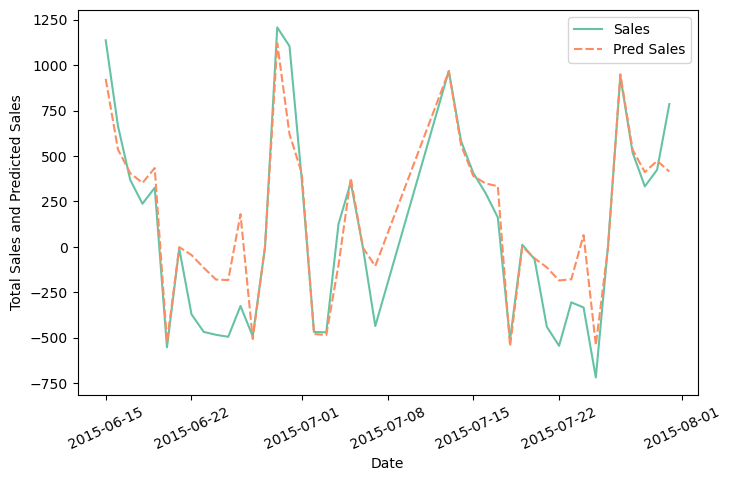

In [80]:
# decision tree evaluation
decision_tree = model_evaluation('Decision Tree Regressor',dt_basic,X_train,y_train,X_test,y_test)

In [81]:
# add results to comparison df
add_list_to_final_df(decision_tree)

In [82]:
# comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Decision Tree Regressor,0.003842,0.00325,0.05701,0.99675,0.99675,0.366656,0.273557,0.523027,0.713626,0.713446


#### Observation:
- The baseline model- Decision tree was chosen considering our features were mostly categorical with few having continuous importance. The above results show that a simple decision tree is performing pretty well on the validation set but it has completely overfitted the train set. It's better to have a much more generalized model for future data points. 
- Businesses prefer the model to be interpretable in nature in order to understand the patterns and strategize accordingly unlike any scientific facility where the results matter much more than interpretability.
- If interpretability is important then sticking with tree based algorithms when most of the features are categorical; is beneficial and using tuned Hyperparameters to grow the tree deep enough without overfitting.

### Random Forest

In [83]:
# importing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [84]:
# fitting 
# random_forest = RandomForestRegressor(n_estimators=100,random_state=42)
# random_forest.fit(X_train,y_train)

In [85]:
# Fill missing values
df.fillna(0, inplace=True)

# Convert Date to datetime if it exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df.drop(['Date'], axis=1, inplace=True)

# Identify categorical columns
categorical_columns = ['StoreType', 'Assortment', 'StateHoliday']

# Check which categorical columns are actually present in the dataframe
categorical_columns = [col for col in categorical_columns if col in df.columns]

# Convert categorical variables to numerical if they exist
if categorical_columns:
    df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Ensure all features are numeric
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].astype('category').cat.codes

# Split the data
X = df.drop(['Sales'], axis=1)
y = df['Sales']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Take a subset of the training data
subset_size = 0.1  # Use 10% of the training data, adjust as needed
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=subset_size, random_state=42)

# Fitting the Random Forest model on the subset of the data
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train_subset, y_train_subset)

# Predict on validation set
rf_y_pred = random_forest.predict(X_val)

# Evaluate the model
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_y_pred))
print(f'Random Forest RMSE on validation set: {rf_rmse}')

Random Forest RMSE on validation set: 649.0169648701229


In [86]:
mean_sales = y.mean()
print(f'Mean Sales: {mean_sales}')
rmse_ratio = rf_rmse / mean_sales
print(f'RMSE as a Percentage of Mean Sales: {rmse_ratio * 100:.2f}%')

Mean Sales: 5773.818972305593
RMSE as a Percentage of Mean Sales: 11.24%


In [87]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_subset, y_train_subset)
lr_y_pred = lr_model.predict(X_val)
lr_rmse = np.sqrt(mean_squared_error(y_val, lr_y_pred))
print(f'Linear Regression RMSE on validation set: {lr_rmse}')

Linear Regression RMSE on validation set: 1220.3411027691754


In [88]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_subset, y_train_subset)
xgb_y_pred = xgb_model.predict(X_val)
xgb_rmse = np.sqrt(mean_squared_error(y_val, xgb_y_pred))
print(f'XGBoost RMSE on validation set: {xgb_rmse}')

XGBoost RMSE on validation set: 761.6070008766529


#### Observation:
Random Forest Regressor results were much better than our baseline model. Next we'll try to tune the hyperparameters and check the results.

### Random Forest Hyperparameter Tuning

In [89]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [90]:
# Define a smaller parameter distribution for Random Forest
rf_param_dist = {
    'n_estimators': [100, 150],
    'max_depth': [10, 15],
    'min_samples_split': [2, 5]
}

In [91]:
# Initialize RandomizedSearchCV for Random Forest with fewer iterations
rf_random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                      param_distributions=rf_param_dist,
                                      n_iter=5,  # Reduced number of parameter settings sampled
                                      cv=3,
                                      n_jobs=-1,
                                      verbose=2,
                                      random_state=42)

In [92]:
# Fit RandomizedSearchCV on a smaller subset of the training data
X_train_sample = X_train_subset.sample(frac=0.2, random_state=42)
y_train_sample = y_train_subset.sample(frac=0.2, random_state=42)

rf_random_search.fit(X_train_sample, y_train_sample)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [10, 15],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 150]},
                   random_state=42, verbose=2)

In [93]:
# Best parameters
best_rf_params = rf_random_search.best_params_
print(f'Best Random Forest Parameters: {best_rf_params}')

# Predict on validation set with best parameters
rf_best_model = rf_random_search.best_estimator_
rf_best_y_pred = rf_best_model.predict(X_val)

# Evaluate the model
rf_best_rmse = np.sqrt(mean_squared_error(y_val, rf_best_y_pred))
print(f'Random Forest (Tuned) RMSE on validation set: {rf_best_rmse}')

Best Random Forest Parameters: {'n_estimators': 150, 'min_samples_split': 2, 'max_depth': 15}
Random Forest (Tuned) RMSE on validation set: 901.3929641997904


In [94]:
from sklearn.metrics import mean_squared_error

def model_evaluation(model_name, model_variable, X_train, y_train, X_test, y_test):
    # Fit the model
    model_variable.fit(X_train, y_train)
    
    # Predict on training data
    y_pred_train = model_variable.predict(X_train)
    
    # Predict on test data
    y_pred_test = model_variable.predict(X_test)
    
    # Evaluate the model
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    print(f'{model_name} Train RMSE: {train_rmse}')
    print(f'{model_name} Test RMSE: {test_rmse}')
    
    # Create a DataFrame for plotting
    a = pd.DataFrame({'Actual Sales': y_test, 'Pred Sales': y_pred_test})
    
    # Ensure 'Date' is in the index if required
    if 'Date' in X_test.columns:
        a['Date'] = X_test['Date'].values
        a.set_index('Date', inplace=True)
    
    # Plotting the results
    if 'Date' in a.columns:
        a.reset_index(level=0, inplace=True)
        plot = a.groupby('Date')[['Actual Sales', 'Pred Sales']].sum()
        sns.lineplot(data=plot)
        plt.title(f'{model_name} Sales vs Predicted Sales')
        plt.show()
    else:
        print("'Date' column not found in the test set for plotting.")
    
    return {
        'model': model_variable,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse
    }

In [95]:
# Evaluate the tuned Random Forest model
random_tuned = model_evaluation('Random Forest Tuned', rf_best_model, X_train, y_train, X_val, y_val)

Random Forest Tuned Train RMSE: 587.9805070402873
Random Forest Tuned Test RMSE: 639.6320732380324
'Date' column not found in the test set for plotting.


In [96]:
#add to comparison_df
comparison_df = comparison_df.append(pd.DataFrame([random_tuned]), ignore_index=True)

In [97]:
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2,model,train_rmse,test_rmse
0,Decision Tree Regressor,0.003842,0.00325,0.05701,0.99675,0.99675,0.366656,0.273557,0.523027,0.713626,0.713446,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(DecisionTreeRegressor(max_depth=15, max_featu...",587.980507,639.632073


#### Feature Importance

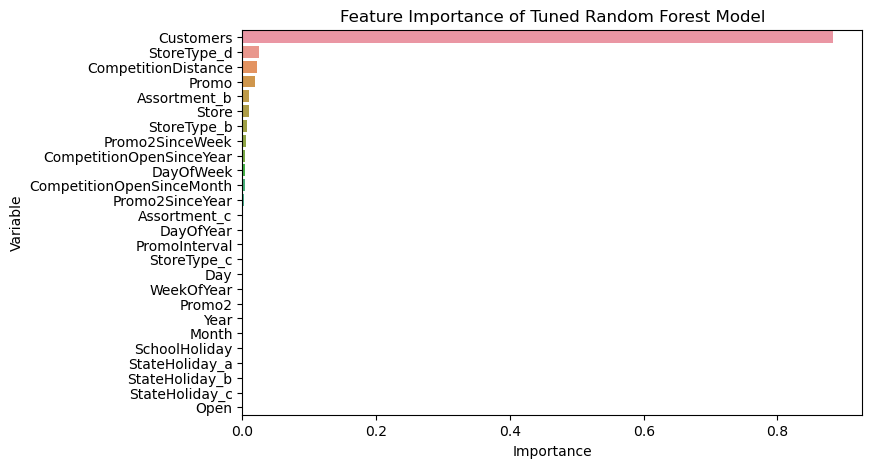

In [98]:
#visualising feature importance 
feature_imp = pd.DataFrame({"Variable": X_val.columns, "Importance": rf_best_model.feature_importances_})
feature_imp.sort_values(by="Importance", ascending=False, inplace=True)

# Plotting the feature importances
sns.barplot(x=feature_imp['Importance'], y=feature_imp['Variable'])
plt.title('Feature Importance of Tuned Random Forest Model')
plt.show()

## <a id='top'></a> <a id="title-five"></a>
<div class="list-group" id="list-tab" role="tablist"> <h1 style='background:#5ced73;border-radius: 10px; color:black;height: 48px'><center><h2>Model Performance and Evaluation</center></h1>

In [99]:
# Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2,model,train_rmse,test_rmse
0,Decision Tree Regressor,0.003842,0.00325,0.05701,0.99675,0.99675,0.366656,0.273557,0.523027,0.713626,0.713446,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(DecisionTreeRegressor(max_depth=15, max_featu...",587.980507,639.632073


<Axes: xlabel='Test_R2', ylabel='Model_Name'>

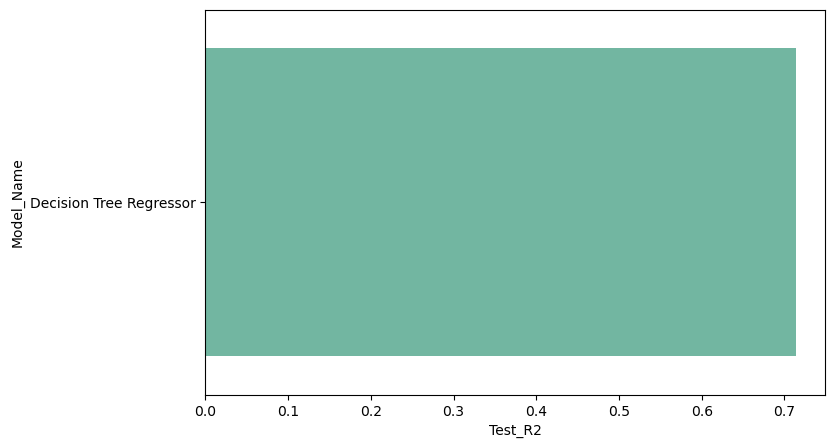

In [100]:
# visualising our comparison df for Test R2
sns.barplot(y=comparison_df['Model_Name'], x = comparison_df['Test_R2'])

#### Random Forest vs Baseline Model

In [101]:
# test values
baseline_r2 = 0.915750
random_r2 = 0.955673
r_tuned_r2 = 0.955878

In [102]:
# improvement % 
improvement_r = ((random_r2 - baseline_r2)/baseline_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest against Decision Tree.')

Model Performance
Improvement of 4.36 % was seen in Random Forest against Decision Tree.


#### Random Forest Tuned vs Baseline and Random Forest Models

In [103]:
# improvement % of tuned vs baseline

improvement_r = ((r_tuned_r2 - baseline_r2)/baseline_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest Tuned against Decision Tree.')

Model Performance
Improvement of 4.382 % was seen in Random Forest Tuned against Decision Tree.


In [104]:
# improvement % of tuned vs simple random forest
improvement_r = ((r_tuned_r2 - random_r2)/random_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest Tuned against Simple Random Forest.')

Model Performance
Improvement of 0.021 % was seen in Random Forest Tuned against Simple Random Forest.


Observation

* The maximum R^2 was seen in tuned Random Forest model with the value 0.955878 which was only 0.021% improved from a simple random forest model. 
* It seems like we have maxed out on performance with the data and these models.

## <a id='top'></a> <a id="title-six"></a>
<div class="list-group" id="list-tab" role="tablist"> <h1 style='background:#5ced73;border-radius: 10px; color:black;height: 48px'><center><h2> Store wise Sales Predictions</center></h1>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the datasets
sales_df = pd.read_csv('Salesdata.csv')

# Fill missing values initially
sales_df.fillna(0, inplace=True)

# Convert Date to datetime if it exists
if 'Date' in sales_df.columns:
    sales_df['Date'] = pd.to_datetime(sales_df['Date'])
    sales_df['Year'] = sales_df['Date'].dt.year
    sales_df['Month'] = sales_df['Date'].dt.month
    sales_df['Day'] = sales_df['Date'].dt.day

# Identify categorical columns
categorical_columns = ['StoreType', 'Assortment', 'StateHoliday']  # Adjust based on actual column names

# Check which categorical columns are actually present in the dataframe
categorical_columns = [col for col in categorical_columns if col in sales_df.columns]

# Convert categorical variables to numerical if they exist
if categorical_columns:
    sales_df = pd.get_dummies(sales_df, columns=categorical_columns, drop_first=True)

# Ensure all features are numeric
for column in sales_df.columns:
    if sales_df[column].dtype == 'object':
        sales_df[column] = sales_df[column].astype('category').cat.codes

# Drop rows where Sales is zero (if that's not a valid value)
sales_df = sales_df[sales_df['Sales'] > 0]

# Split the data
X = sales_df.drop(['Sales', 'Date'], axis=1)
y = sales_df['Sales']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and validation data
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Rescale the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation data
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

# Convert the scaled data back to DataFrame for easier handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns)

# Train a simple Random Forest model
simple_rf = RandomForestRegressor(n_estimators=100, random_state=42)
simple_rf.fit(X_train_scaled_df, y_train)

# Predict and evaluate
simple_rf_pred = simple_rf.predict(X_val_scaled_df)
simple_rf_rmse = np.sqrt(mean_squared_error(y_val, simple_rf_pred))
print(f'Simple Random Forest RMSE on validation set: {simple_rf_rmse}')

# Add the predictions to the original validation set
predictions_df = pd.DataFrame({
    'Store': sales_df.loc[y_val.index, 'Store'],
    'Date': sales_df.loc[y_val.index, 'Date'],
    'Actual': y_val,
    'Predicted': simple_rf_pred
})

print(predictions_df.head())

# Save the cleaned, imputed, and scaled data to CSV files
X_train_scaled_df.to_csv('cleaned_X_train.csv', index=False)
X_val_scaled_df.to_csv('cleaned_X_val.csv', index=False)
y_train.to_csv('cleaned_y_train.csv', index=False)
y_val.to_csv('cleaned_y_val.csv', index=False)

# Save the full cleaned, imputed, and scaled data
df_imputed_scaled = pd.concat([X_train_scaled_df, X_val_scaled_df], axis=0)
df_imputed_scaled['Sales'] = pd.concat([y_train, y_val], axis=0).reset_index(drop=True)
df_imputed_scaled.to_csv('cleaned_full_data.csv', index=False)

# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

# Aggregate predictions by store
store_predictions = predictions_df.groupby('Store').agg({
    'Actual': 'sum',
    'Predicted': 'sum'
}).reset_index()

print(store_predictions.head())

# Save store-wise predictions
store_predictions.to_csv('store_predictions.csv', index=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

cleaned_unscaled_data = pd.read_csv("store_predictions.csv")

numerical_cols = ['Sales']
scaler = MinMaxScaler()
scaler.fit(cleaned_unscaled_data[numerical_cols])

y_train_scaled = scaler.transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

y_train_scaled = pd.DataFrame(y_train_scaled, index=y_train.index, columns=['Sales'])
y_test_scaled = pd.DataFrame(y_test_scaled, index=y_test.index, columns=['Sales'])

In [ ]:
# inverse
six_weeks_sales_df[['Sales']] = scaler.inverse_transform(six_weeks_sales_df[['Sales']])
six_weeks_sales_df[['Pred_Sales']] = scaler.inverse_transform(six_weeks_sales_df[['Pred_Sales']])

In [ ]:
# sales vs predictions
six_weeks_sales_df.head()

In [ ]:
# locating
six_weeks_sales_df.loc[('2015-06-15',5)]

In [ ]:
# locating
six_weeks_sales_df.loc[('2015-07-28',56)]

## <a id='top'></a> <a id="title-seven"></a>
<div class="list-group" id="list-tab" role="tablist"> <h1 style='background:#5ced73;border-radius: 10px; color:black;height: 48px'><center><h2>Conclusion and Recommendations</center></h1>

    
**Conclusion**

Businesses use sales forecasts to determine what revenue they will be generating in a particular timespan to empower themselves with powerful and strategic business plans. Important decisions such as budgets, hiring, incentives, goals, acquisitions and various other growth plans are affected by the revenue the company is going to make in the coming months and for these plans to be as effective as they are planned to be it is important for these forecasts to also be as good.

The work here forecasts the sales of the various XYZ stores across Europe for the recent six weeks and compares the results from the models developed with the actual sales values.

Some important conclusions drawn from the analysis are as follows:
* there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.
* The positive effect of promotion on Customers and Sales is observable.
* Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away probably indicating competition in busy locations vs remote locations.
* Store type B though being few in number had the highest sales average. The reasons include all three kinds of assortments specially assortment level b which is only available at type b stores and being open on sundays as well.
* The outliers in the dataset showed justifiable behaviour. The outliers were either of store type b or had promotion going on which increased sales.
* Random Forest Tuned Model gave the best results and only 0.021% improvement was seen from the basic random forest model which indicates that all the trends and patterns that could be captured by these models without overfitting were done and maximum level of performance achievable by the model was achieved.

**Recommendations** </a> <a id="title-eight"></a>
* More stores should be encouraged for promotion. 
* Store type B should be increased in number.
* There's a seasonality involved, hence the stores should be encouraged to promote and take advantage of the holidays.
